<div align="center">
<h1 style="color:#1565c0; font-size:2.8em; font-weight:bold; margin-bottom:0.2em; margin-top:0.5em;">Практична робота №4</h1>
<h3 style="color:#1976d2; margin-top:0; font-weight:normal;">Кластеризацiя засобами
бiблiотеки Scikit-Learn Python <b>Scikit-Learn Python</b></h3>
<br>
<br>
<b>Варіант 12</b><br>
<b>Автори:</b><br>
Плахтій Злата, КА-32<br>
Пастушенко Максим, КА-33<br>
Романов Фелікс, КА-33
</div>


<b>Хід роботи:</b>
1.  Представити початковi данi графiчно.
2.  Побудувати модель кластеризацiї згiдно з варiантом.
3.  Виконати кластеризацiю даних на основi моделi.
4.  Представити розбиття на кластери графiчно (наприклад, рiзними кольорами).
5.  Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок до 100 000 i бiльше).
6.  Побудувати кiлька альтернативних моделей:
    * шляхом змiни значень параметрiв основної моделi;
    * використати рiзнi функцiї вiдстанi (де це можливо);
    * задати рiзнi значення кiлькостi кластерiв (де це параметр).
7.  Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї з `sklearn.metrics` (тiльки метрики згiдно з варiантом):
    * Estimated Number of Clusters
    * Adjusted Rand Index
    * Adjusted Mutual Information
    * Homogeneity
    * Completeness
    * V-measure
    * Silhouette Coefficient
    * Calinski-Harabasz Index
    * Davies-Bouldin index
    * Contingency Matrix
8.  Виконати аналiз результатiв одним з неформальних методiв (тiльки методом згiдно з варiантом):
    * чи є розбиття стабiльним на пiдвибiрках даних?
    * чи є розбиття стабiльним пiсля видалення окремих об’єктiв?
    * чи є розбиття стабiльним пiсля змiни порядку об’єктiв?
    * чи iснує взаємозв’язок мiж результатами i змiнними, якi не враховувалися?
    * чи можна iнтерпретувати результати?
9.  Виконати пункти 1-8 для заданих двох наборiв даних рiзної форми.
10. Зробити висновки про якiсть роботи моделей та про швидкодiю методу.
11. Оцiнити результати (на основi метрик та неформальних методiв). Спробувати пiдiбрати найкращу модель для кожного набору даних
## Завдання (Варіант 12)
* **Алгоритм:** `Birch`
* **Метрики якостi:**
    * Estimated number of clusters
    * Adjusted Rand Index
    * Adjusted Mutual Information
    * Silhouette Coefficient
* **Неформальний метод:**
    * Чи є розбиття стабiльним пiсля змiни порядку об’єктiв у множинi об’єктiв?
* **Початковi данi:**
    1.  `sklearn.datasets.make_moons`
    2.  `sklearn.datasets.load_iris`


КРОК 1: ЗАВАНТАЖЕННЯ ТА ПЕРВИННИЙ АНАЛІЗ ДАНИХ

📁 Завантаження даних з: C:\Users\Zlata\OneDrive\Documents\GitHub\Data_Analysis\lab_4\data\iris_dataset.csv

✅ Дані успішно завантажено!

----------------------------------------------------------------------
1.1 БАЗОВА ІНФОРМАЦІЯ ПРО ДАТАСЕТ
----------------------------------------------------------------------

📊 Розмірність датасету: (150, 5)
   - Кількість зразків: 150
   - Кількість ознак: 4 (без target)

📋 Перші 5 рядків:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0

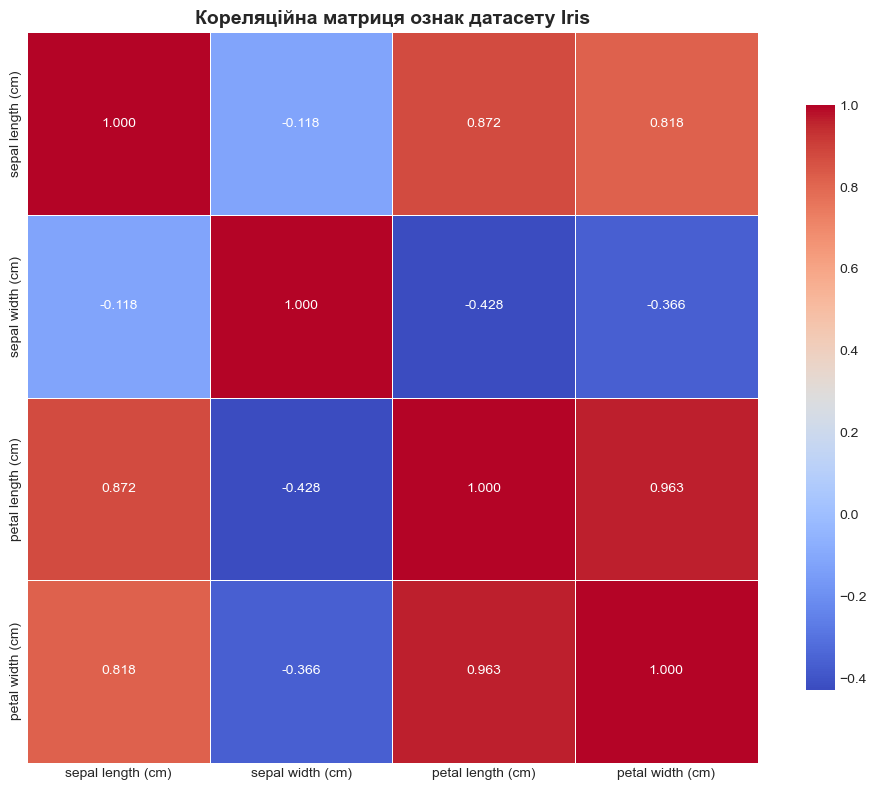


📊 Створення box plots для кожної ознаки...


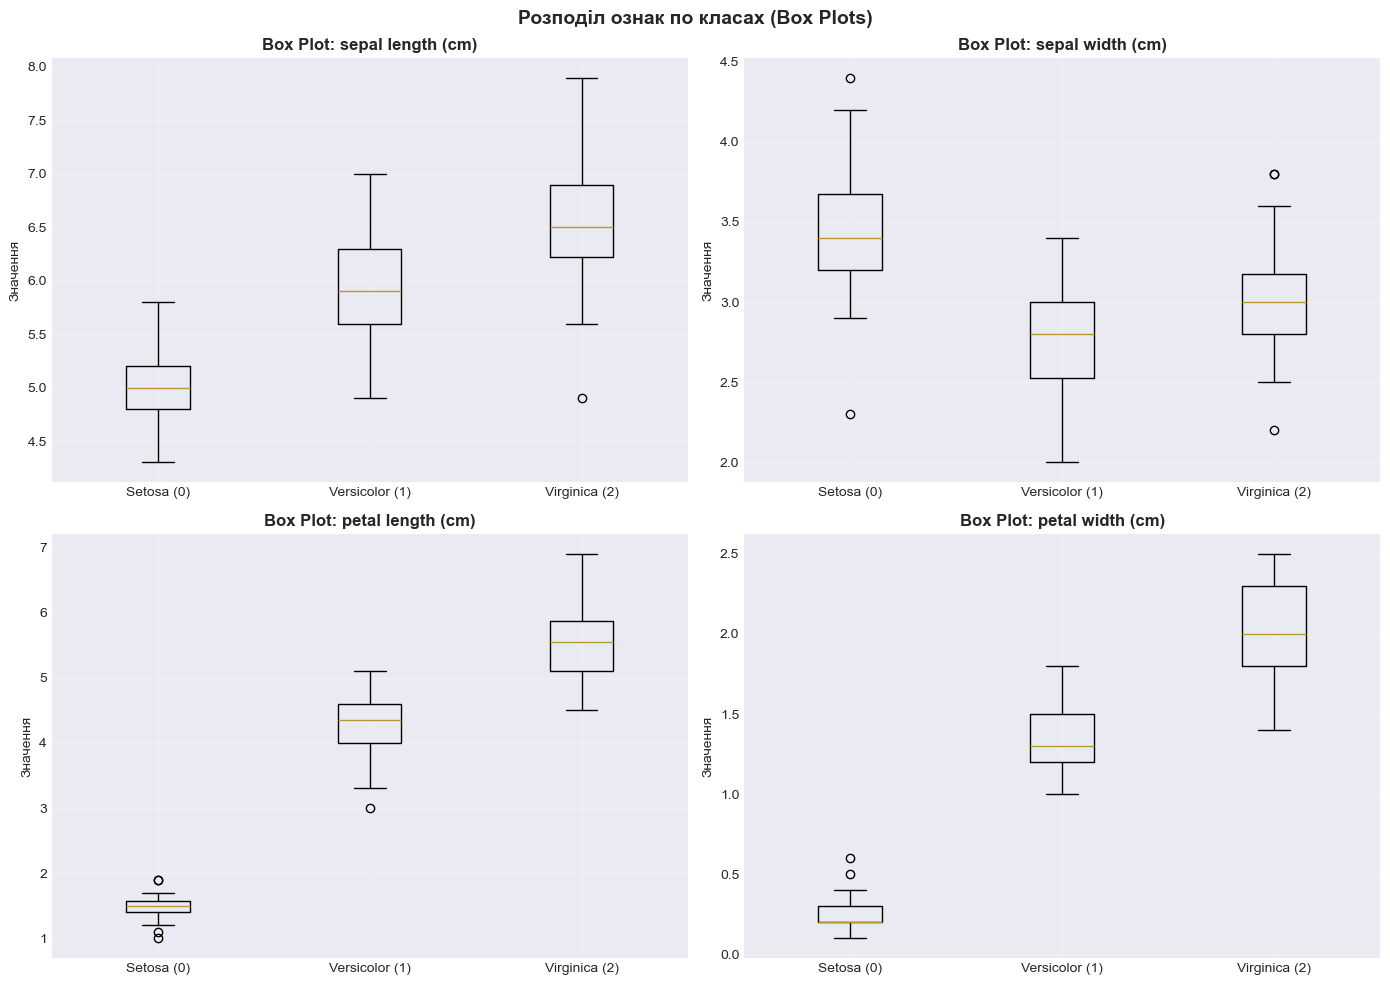


📊 Створення pair plot (може зайняти кілька секунд)...


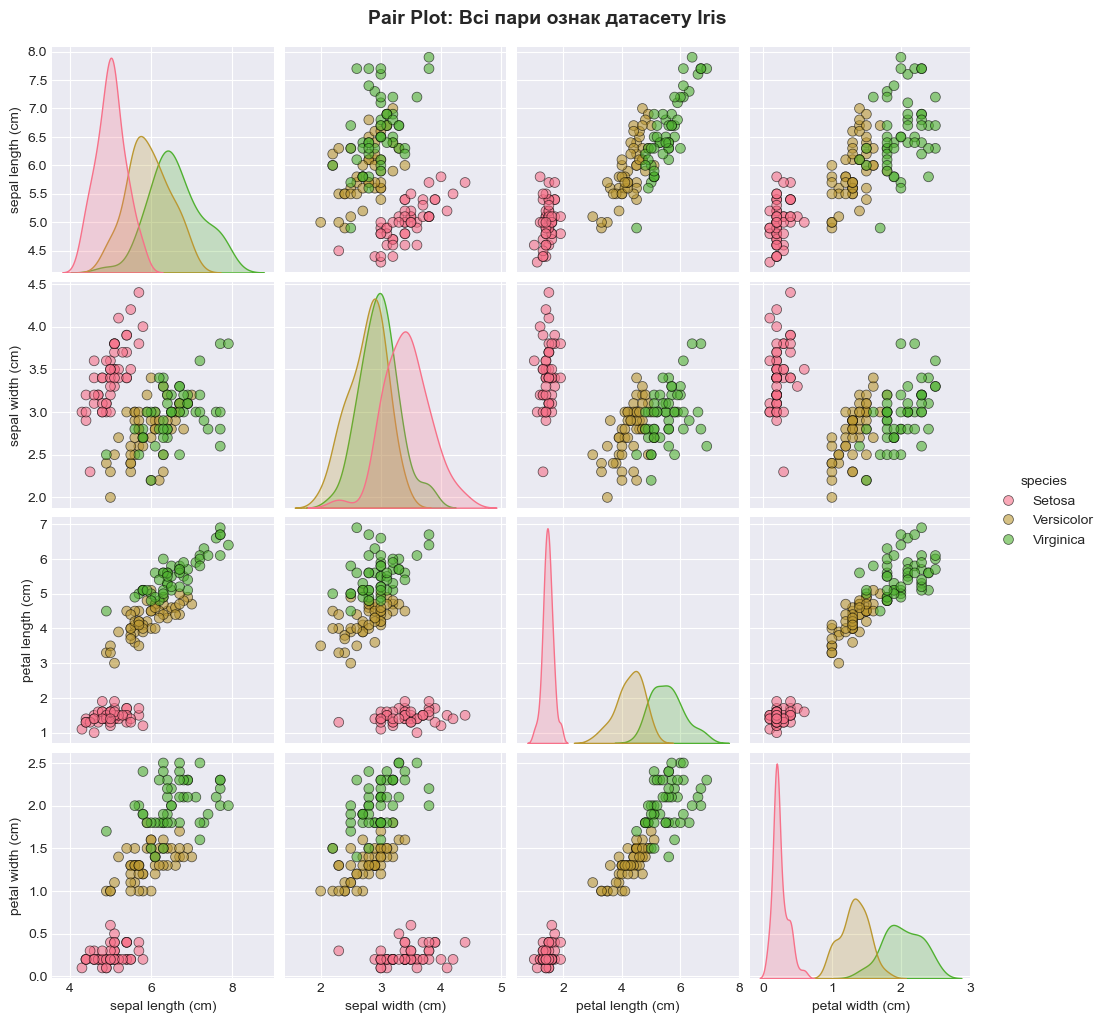


📊 Створення scatter plots для всіх пар ознак...


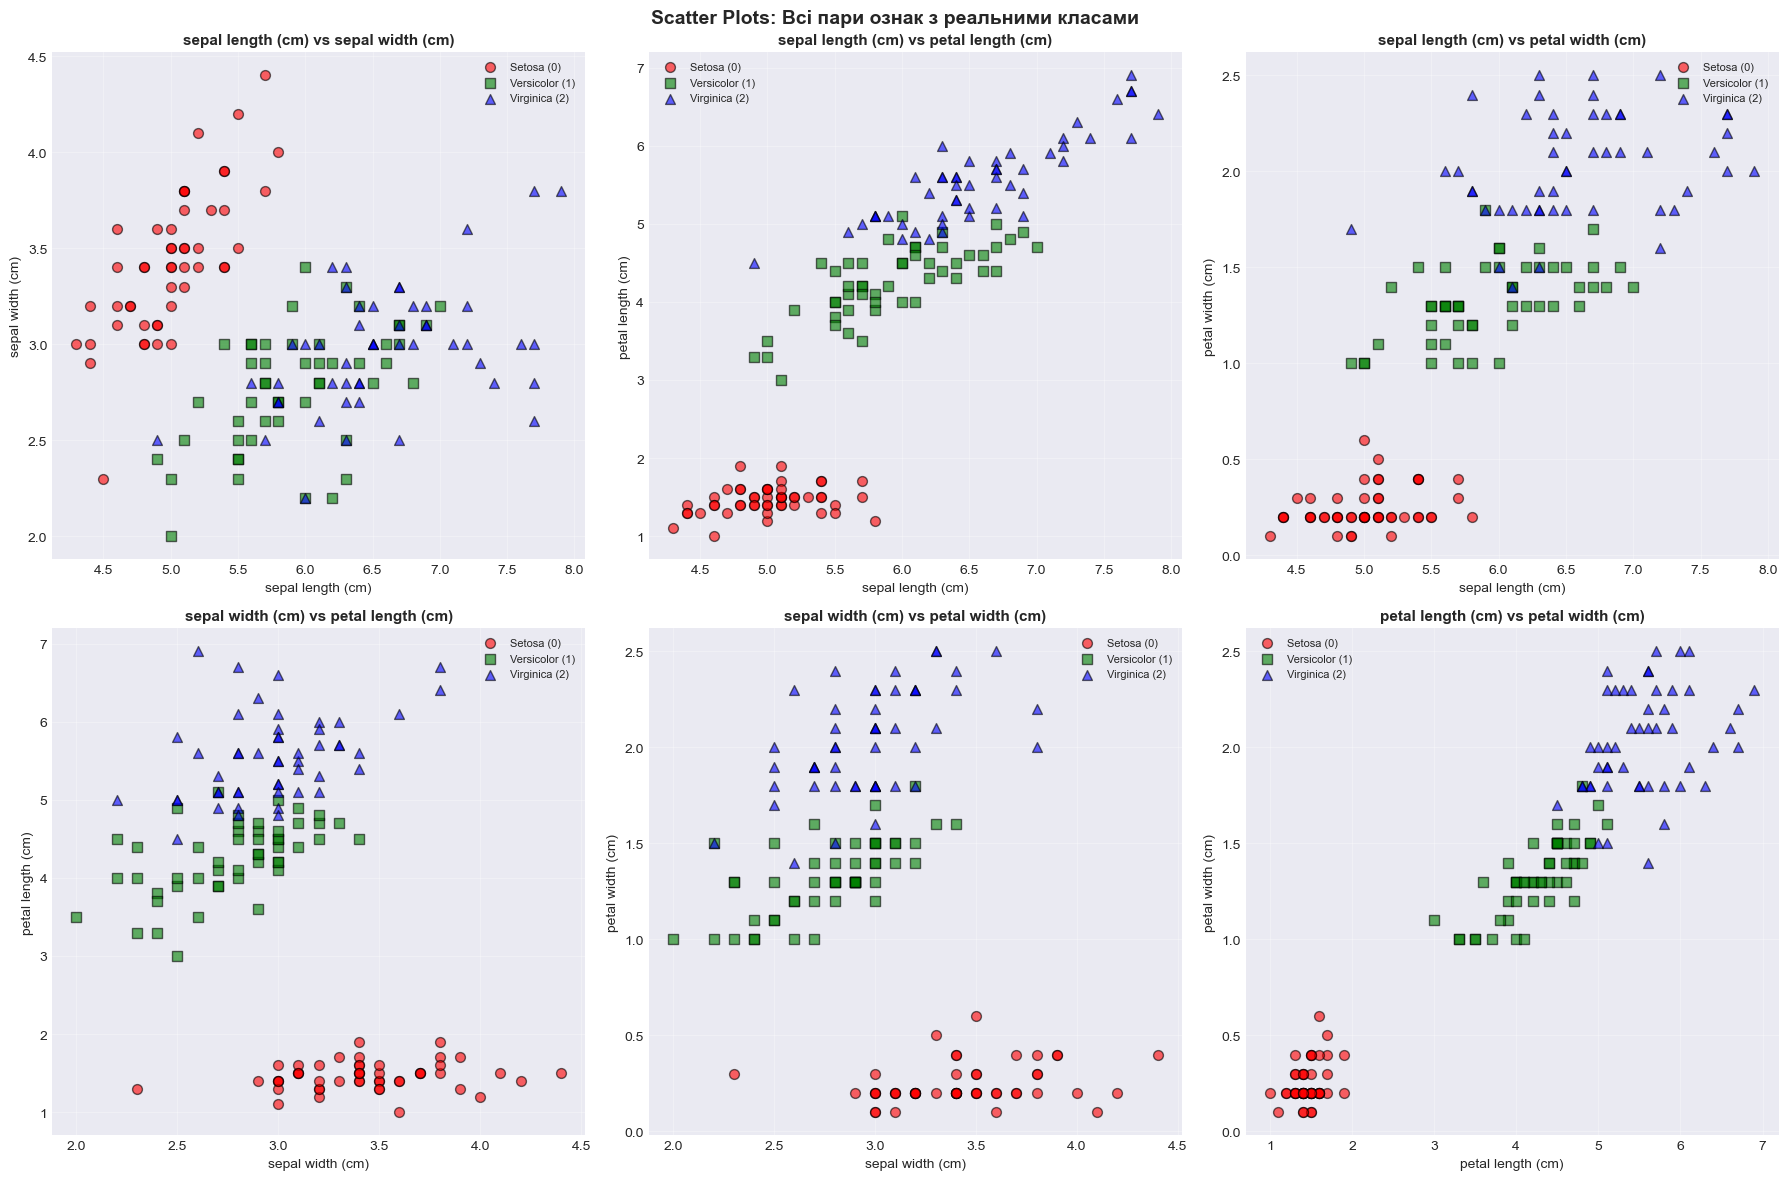


📊 Виконання PCA для візуалізації в 2D...

📉 Пояснена дисперсія (2 компоненти):
   - PC1: 0.7296 (72.96%)
   - PC2: 0.2285 (22.85%)
   - Загалом: 0.9581 (95.81%)


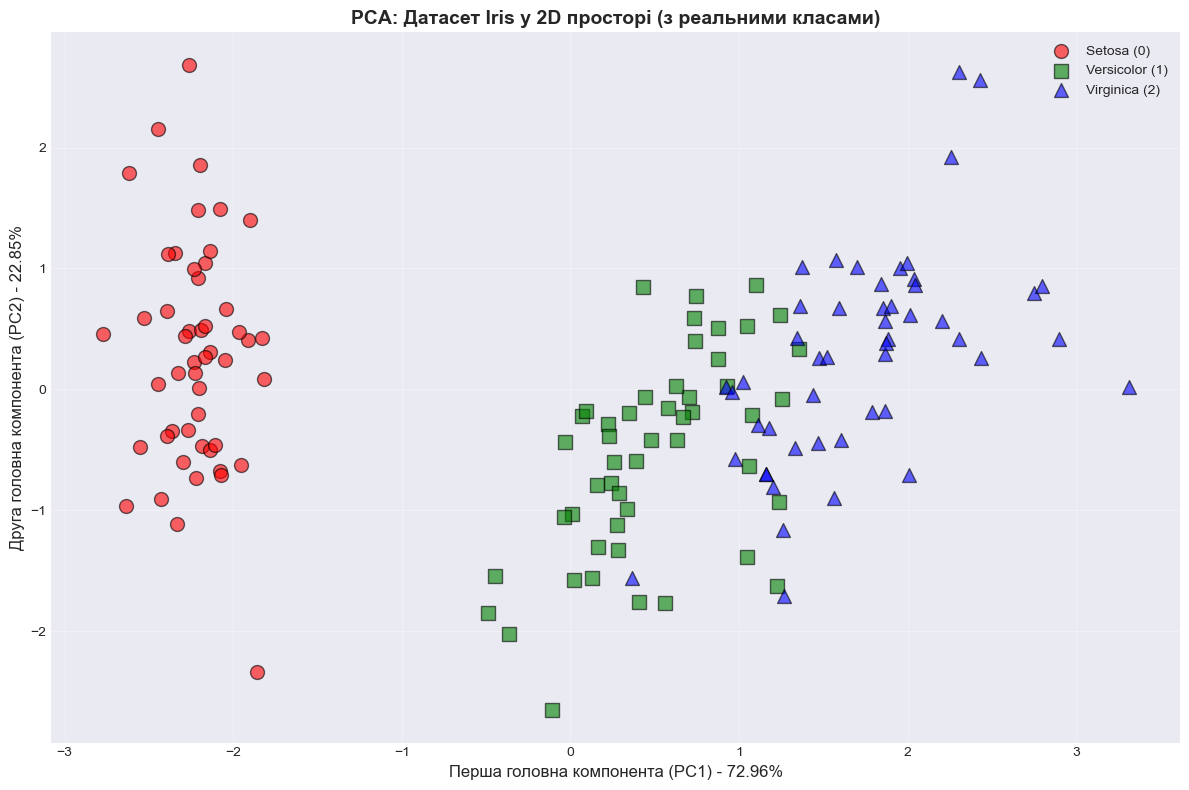


📊 Виконання PCA для візуалізації в 3D...

📉 Пояснена дисперсія (3 компоненти):
   - PC1: 0.7296 (72.96%)
   - PC2: 0.2285 (22.85%)
   - PC3: 0.0367 (3.67%)
   - Загалом: 0.9948 (99.48%)


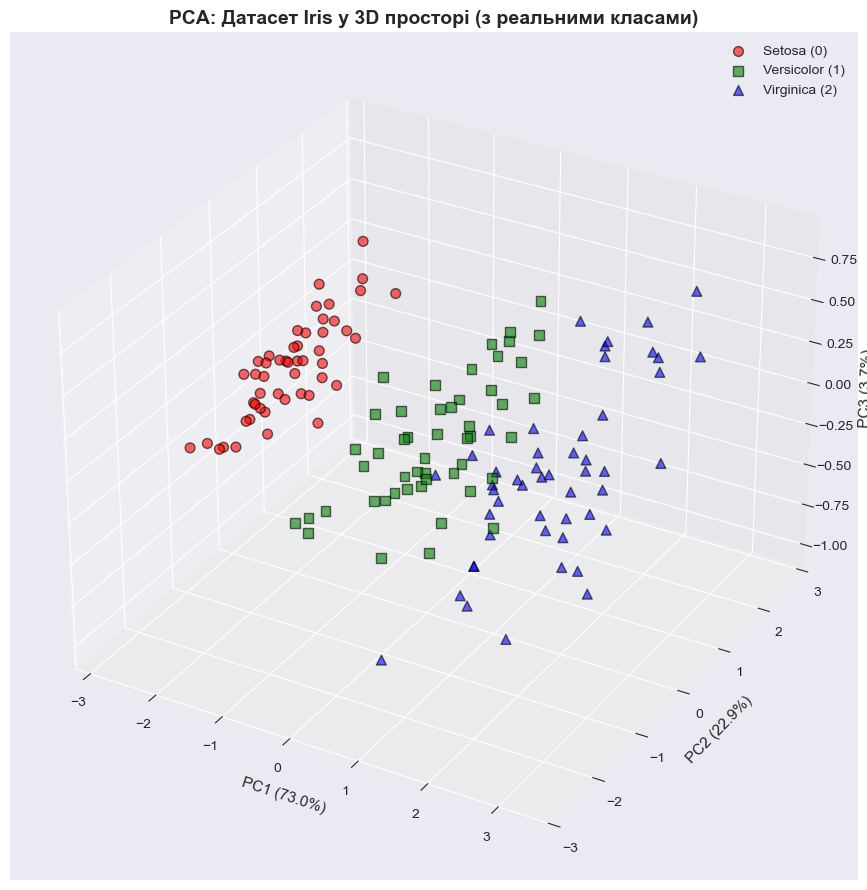


📊 Створення гістограм розподілу ознак...


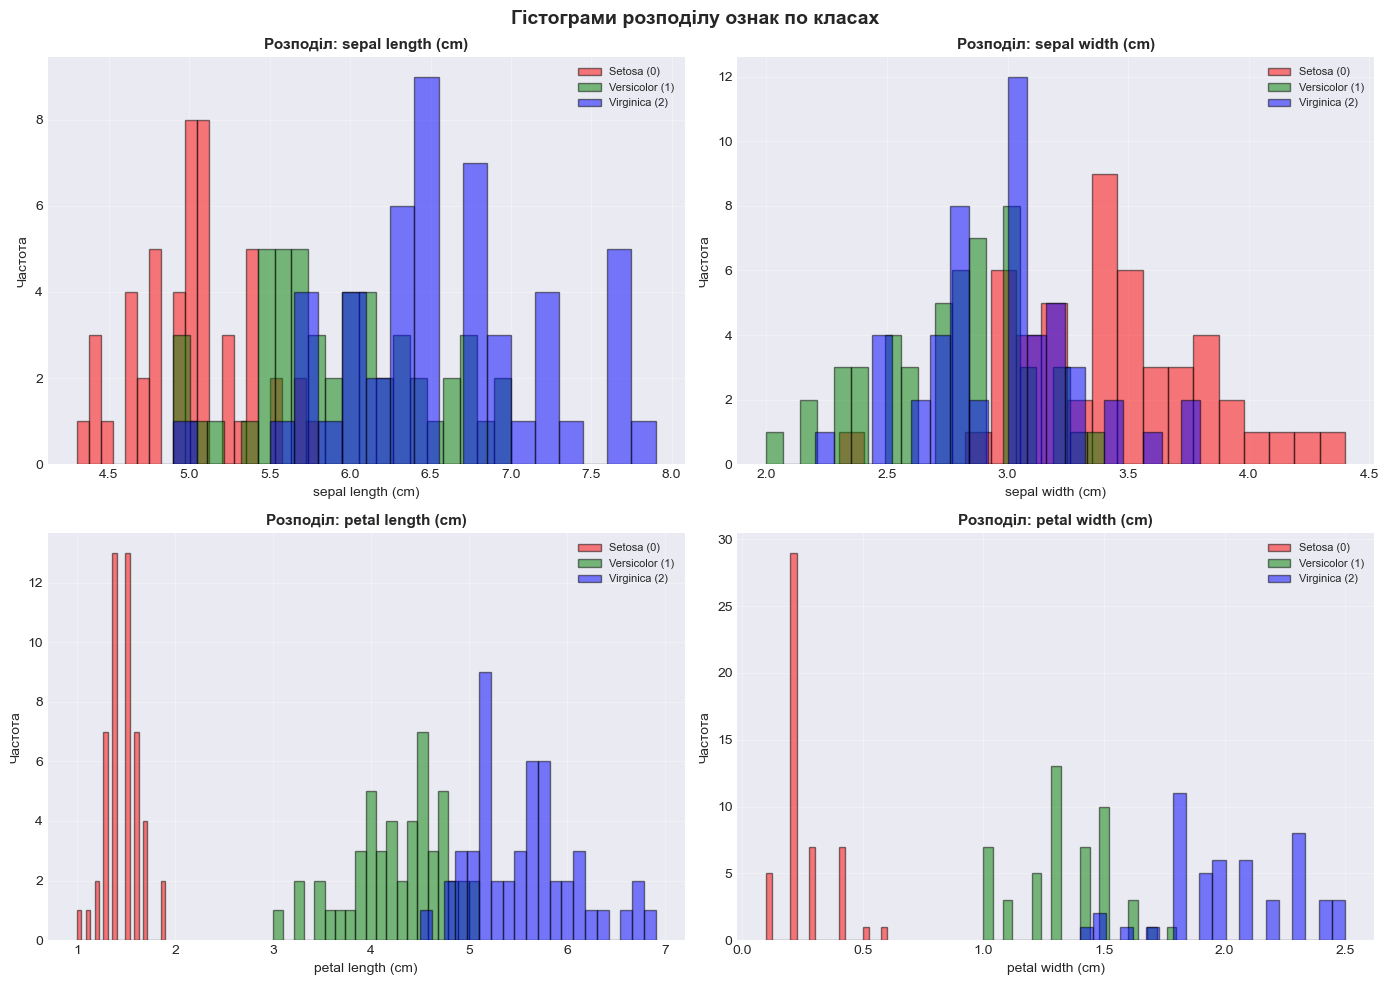


ЗБЕРЕЖЕННЯ ОБРОБЛЕНИХ ДАНИХ

💾 Стандартизовані дані збережено: C:\Users\Zlata\OneDrive\Documents\GitHub\Data_Analysis\lab_4\data\iris_scaled.csv
💾 PCA дані (2D) збережено: C:\Users\Zlata\OneDrive\Documents\GitHub\Data_Analysis\lab_4\data\iris_pca.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Налаштування стилю графіків
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# ============================================================================
# КРОК 1: ЗАВАНТАЖЕННЯ ТА ПЕРВИННИЙ АНАЛІЗ ДАНИХ
# ============================================================================

print("\n" + "="*70)
print("КРОК 1: ЗАВАНТАЖЕННЯ ТА ПЕРВИННИЙ АНАЛІЗ ДАНИХ")
print("="*70)

# Визначення шляху до файлу
# У Jupyter Notebook змінна __file__ відсутня, тому обробляємо обидва варіанти
try:
    script_directory = Path(__file__).parent
except NameError:
    # __file__ не визначено в інтерактивному середовищі (наприклад, Jupyter)
    script_directory = Path().resolve()

iris_filepath = script_directory / "data" / "iris_dataset.csv"

# Завантаження даних
print(f"\n📁 Завантаження даних з: {iris_filepath}")
df = pd.read_csv(iris_filepath)

print("\n✅ Дані успішно завантажено!")

# 1.1 Базова інформація про датасет
print("\n" + "-"*70)
print("1.1 БАЗОВА ІНФОРМАЦІЯ ПРО ДАТАСЕТ")
print("-"*70)

print(f"\n📊 Розмірність датасету: {df.shape}")
print(f"   - Кількість зразків: {df.shape[0]}")
print(f"   - Кількість ознак: {df.shape[1] - 1} (без target)")

print("\n📋 Перші 5 рядків:")
print(df.head())

print("\n📋 Останні 5 рядків:")
print(df.tail())

print("\n🏷️ Типи даних:")
print(df.dtypes)

print("\n🔢 Інформація про датасет:")
df.info()

# 1.2 Статистичні характеристики
print("\n" + "-"*70)
print("1.2 СТАТИСТИЧНІ ХАРАКТЕРИСТИКИ")
print("-"*70)

print("\n📈 Описова статистика для всіх ознак:")
print(df.describe())

print("\n📊 Статистика по цільовій змінній (target):")
print(df['target'].value_counts().sort_index())

target_names = ['Setosa (0)', 'Versicolor (1)', 'Virginica (2)']
print("\nРозподіл класів:")
for i, name in enumerate(target_names):
    count = (df['target'] == i).sum()
    percentage = (count / len(df)) * 100
    print(f"  {name}: {count} зразків ({percentage:.1f}%)")

# 1.3 Перевірка на пропущені значення
print("\n" + "-"*70)
print("1.3 ПЕРЕВІРКА НА ПРОПУЩЕНІ ЗНАЧЕННЯ")
print("-"*70)

missing_values = df.isnull().sum()
print("\n🔍 Кількість пропущених значень по стовпцях:")
print(missing_values)

if missing_values.sum() == 0:
    print("\n✅ Пропущені значення відсутні!")
else:
    print(f"\n⚠️ Загальна кількість пропущених значень: {missing_values.sum()}")

# 1.4 Кореляційна матриця
print("\n" + "-"*70)
print("1.4 КОРЕЛЯЦІЙНА МАТРИЦЯ МІЖ ОЗНАКАМИ")
print("-"*70)

# Відокремлюємо ознаки (без target)
feature_columns = [col for col in df.columns if col != 'target']
X = df[feature_columns].values
y = df['target'].values

correlation_matrix = df[feature_columns].corr()
print("\n📊 Кореляція між ознаками:")
print(correlation_matrix)

# ============================================================================
# КРОК 2: ВІЗУАЛІЗАЦІЯ ПОЧАТКОВИХ ДАНИХ
# ============================================================================

print("\n" + "="*70)
print("КРОК 2: ВІЗУАЛІЗАЦІЯ ПОЧАТКОВИХ ДАНИХ")
print("="*70)

# 2.1 Кореляційна матриця (heatmap)
print("\n📊 Створення теплової карти кореляцій...")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Кореляційна матриця ознак датасету Iris', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# 2.2 Box plots для кожної ознаки
print("\n📊 Створення box plots для кожної ознаки...")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(feature_columns):
    axes[idx].boxplot([df[df['target'] == i][col] for i in range(3)],
                      labels=target_names)
    axes[idx].set_title(f'Box Plot: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Значення')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Розподіл ознак по класах (Box Plots)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# 2.3 Pair plot (матриця діаграм розсіювання)
print("\n📊 Створення pair plot (може зайняти кілька секунд)...")
pairplot_df = df.copy()
pairplot_df['species'] = pairplot_df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

g = sns.pairplot(pairplot_df, hue='species', vars=feature_columns,
                 diag_kind='kde', plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'k'},
                 height=2.5)
g.fig.suptitle('Pair Plot: Всі пари ознак датасету Iris', y=1.02, fontsize=14, fontweight='bold')
plt.show()


# 2.4 Scatter plots для кожної пари ознак з реальними мітками
print("\n📊 Створення scatter plots для всіх пар ознак...")
from itertools import combinations

feature_pairs = list(combinations(range(len(feature_columns)), 2))
n_pairs = len(feature_pairs)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']

for idx, (i, j) in enumerate(feature_pairs):
    for class_idx in range(3):
        mask = y == class_idx
        axes[idx].scatter(X[mask, i], X[mask, j], 
                         c=colors[class_idx], 
                         marker=markers[class_idx],
                         label=target_names[class_idx],
                         alpha=0.6, 
                         edgecolors='k',
                         s=50)
    
    axes[idx].set_xlabel(feature_columns[i], fontsize=10)
    axes[idx].set_ylabel(feature_columns[j], fontsize=10)
    axes[idx].set_title(f'{feature_columns[i]} vs {feature_columns[j]}', 
                       fontsize=11, fontweight='bold')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Scatter Plots: Всі пари ознак з реальними класами', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# 2.5 PCA для зменшення розмірності та візуалізації
print("\n📊 Виконання PCA для візуалізації в 2D...")

# Стандартизація даних (важливо для PCA!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA з 2 компонентами
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"\n📉 Пояснена дисперсія (2 компоненти):")
print(f"   - PC1: {pca_2d.explained_variance_ratio_[0]:.4f} ({pca_2d.explained_variance_ratio_[0]*100:.2f}%)")
print(f"   - PC2: {pca_2d.explained_variance_ratio_[1]:.4f} ({pca_2d.explained_variance_ratio_[1]*100:.2f}%)")
print(f"   - Загалом: {sum(pca_2d.explained_variance_ratio_):.4f} ({sum(pca_2d.explained_variance_ratio_)*100:.2f}%)")

# Візуалізація PCA 2D
plt.figure(figsize=(12, 8))
for class_idx in range(3):
    mask = y == class_idx
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1],
               c=colors[class_idx],
               marker=markers[class_idx],
               label=target_names[class_idx],
               alpha=0.6,
               edgecolors='k',
               s=100)

plt.xlabel(f'Перша головна компонента (PC1) - {pca_2d.explained_variance_ratio_[0]*100:.2f}%', 
           fontsize=12)
plt.ylabel(f'Друга головна компонента (PC2) - {pca_2d.explained_variance_ratio_[1]*100:.2f}%', 
           fontsize=12)
plt.title('PCA: Датасет Iris у 2D просторі (з реальними класами)', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# 2.6 PCA з 3 компонентами для 3D візуалізації
print("\n📊 Виконання PCA для візуалізації в 3D...")

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print(f"\n📉 Пояснена дисперсія (3 компоненти):")
for i in range(3):
    print(f"   - PC{i+1}: {pca_3d.explained_variance_ratio_[i]:.4f} ({pca_3d.explained_variance_ratio_[i]*100:.2f}%)")
print(f"   - Загалом: {sum(pca_3d.explained_variance_ratio_):.4f} ({sum(pca_3d.explained_variance_ratio_)*100:.2f}%)")

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for class_idx in range(3):
    mask = y == class_idx
    ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
              c=colors[class_idx],
              marker=markers[class_idx],
              label=target_names[class_idx],
              alpha=0.6,
              edgecolors='k',
              s=50)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)', fontsize=11)
ax.set_title('PCA: Датасет Iris у 3D просторі (з реальними класами)', 
            fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()


# 2.7 Розподіл кожної ознаки (гістограми)
print("\n📊 Створення гістограм розподілу ознак...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(feature_columns):
    for class_idx in range(3):
        mask = y == class_idx
        axes[idx].hist(X[mask, idx], bins=20, alpha=0.5, 
                      label=target_names[class_idx], 
                      color=colors[class_idx],
                      edgecolor='black')
    
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Частота', fontsize=10)
    axes[idx].set_title(f'Розподіл: {col}', fontsize=11, fontweight='bold')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Гістограми розподілу ознак по класах', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# ============================================================================
# ЗБЕРЕЖЕННЯ ОБРОБЛЕНИХ ДАНИХ
# ============================================================================

print("\n" + "="*70)
print("ЗБЕРЕЖЕННЯ ОБРОБЛЕНИХ ДАНИХ")
print("="*70)

# Збереження стандартизованих даних для подальшого використання
scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)
scaled_df['target'] = y
scaled_filepath = script_directory / "data" / "iris_scaled.csv"
scaled_df.to_csv(scaled_filepath, index=False)
print(f"\n💾 Стандартизовані дані збережено: {scaled_filepath}")

# Збереження PCA даних
pca_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_filepath = script_directory / "data" / "iris_pca.csv"
pca_df.to_csv(pca_filepath, index=False)
print(f"💾 PCA дані (2D) збережено: {pca_filepath}")


КРОК 3-4: ПОБУДОВА БАЗОВОЇ МОДЕЛІ BIRCH ТА ВІЗУАЛІЗАЦІЯ

----------------------------------------------------------------------
СТАНДАРТИЗАЦІЯ ТА НАВЧАННЯ МОДЕЛІ
----------------------------------------------------------------------

Час навчання: 0.005964 сек
Кількість кластерів: 3
Розподіл об'єктів: [71 49 30]

----------------------------------------------------------------------
ВІЗУАЛІЗАЦІЯ РЕЗУЛЬТАТІВ
----------------------------------------------------------------------


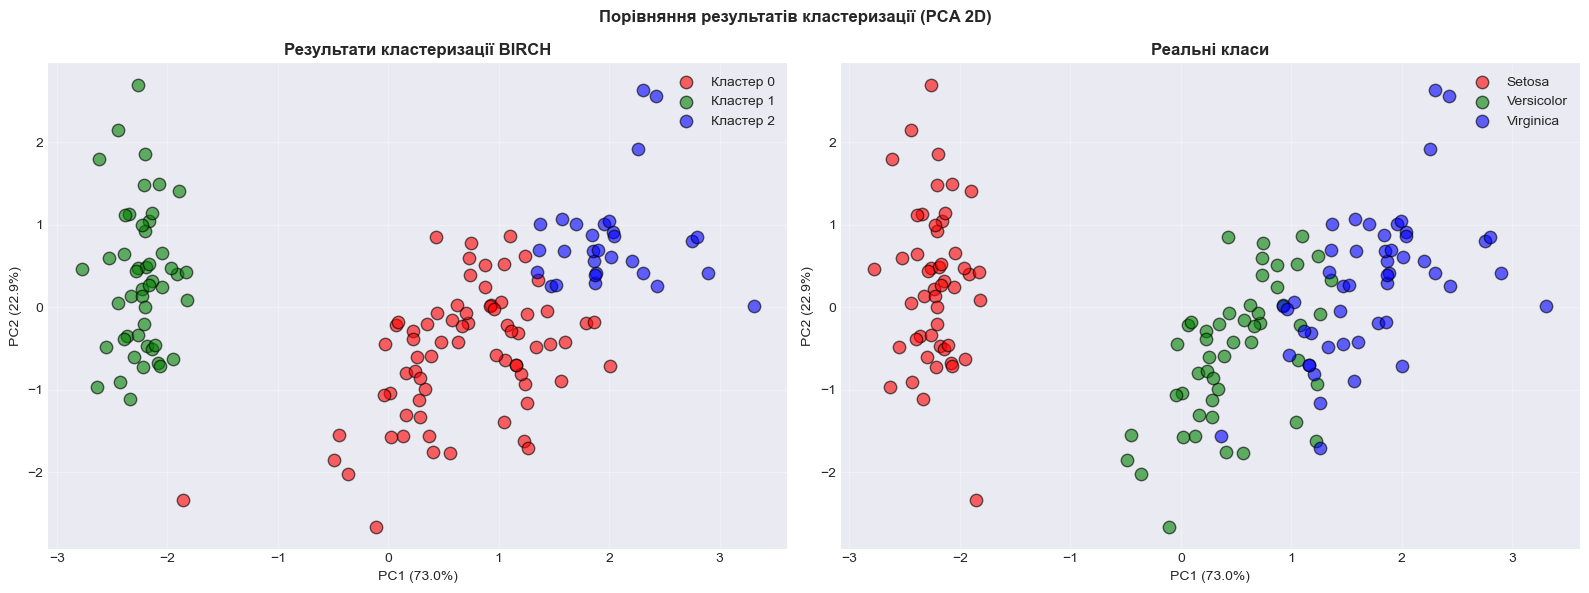

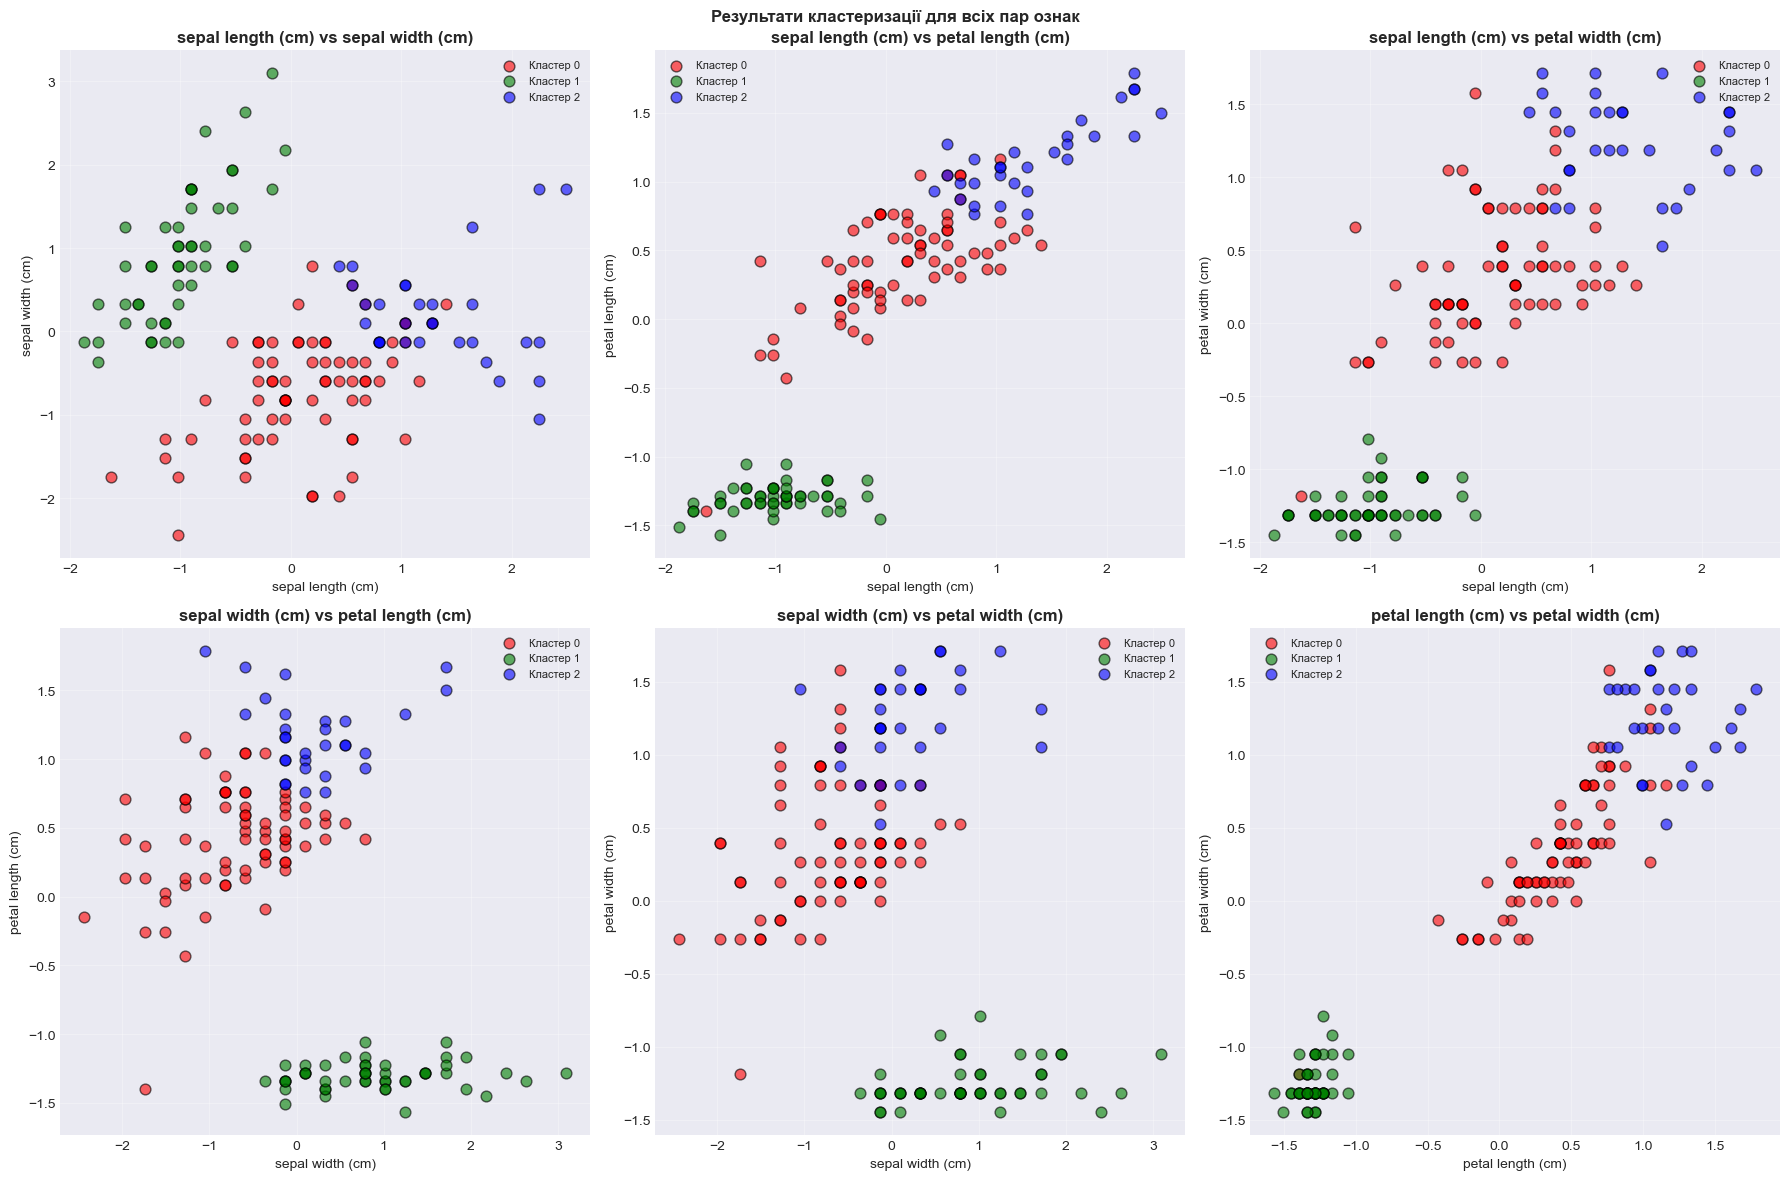

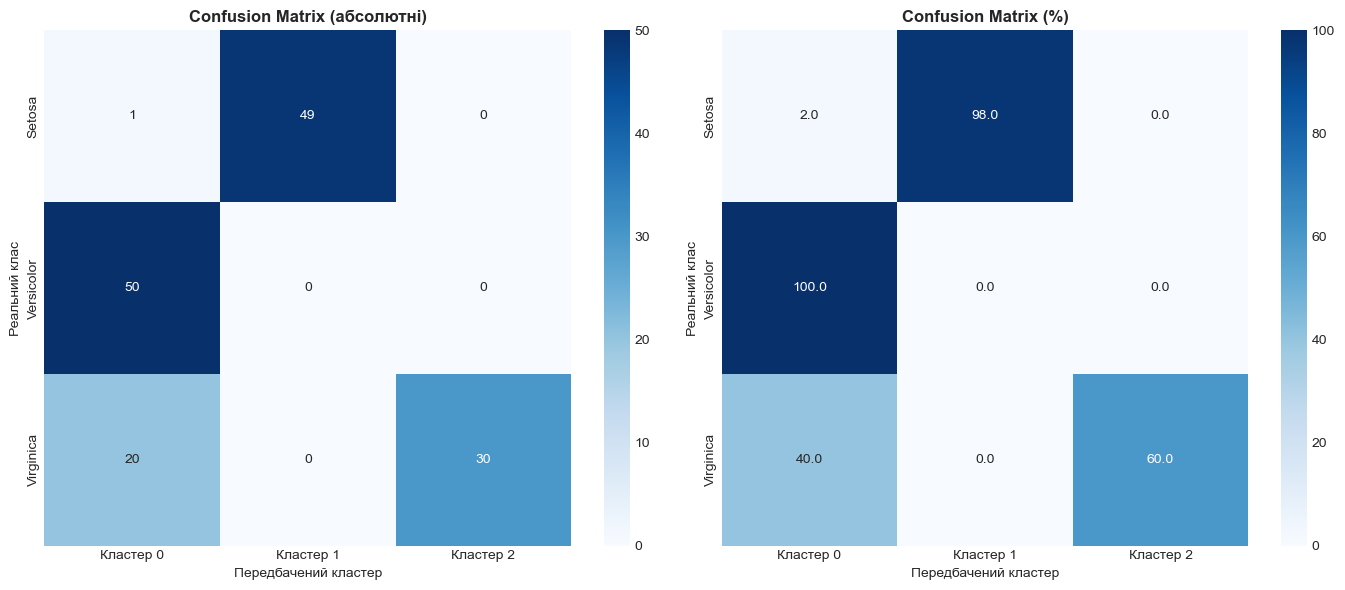


Аналіз відповідності:
Кластер 0 -> Versicolor (70.4%)
Кластер 1 -> Setosa (100.0%)
Кластер 2 -> Virginica (100.0%)


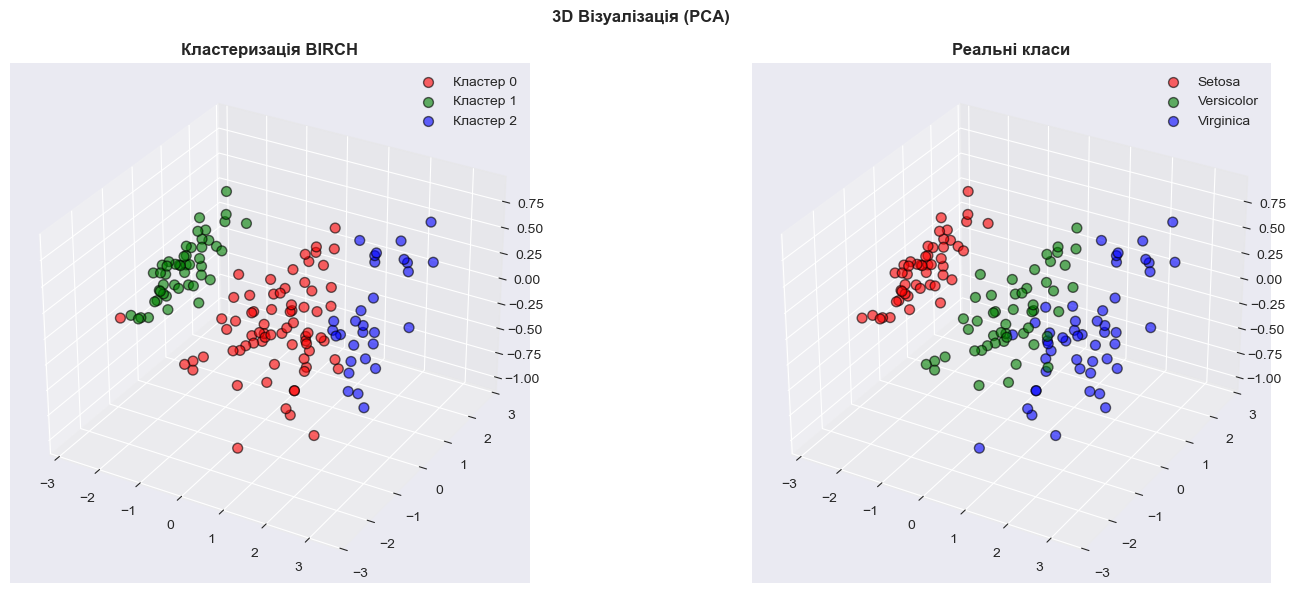

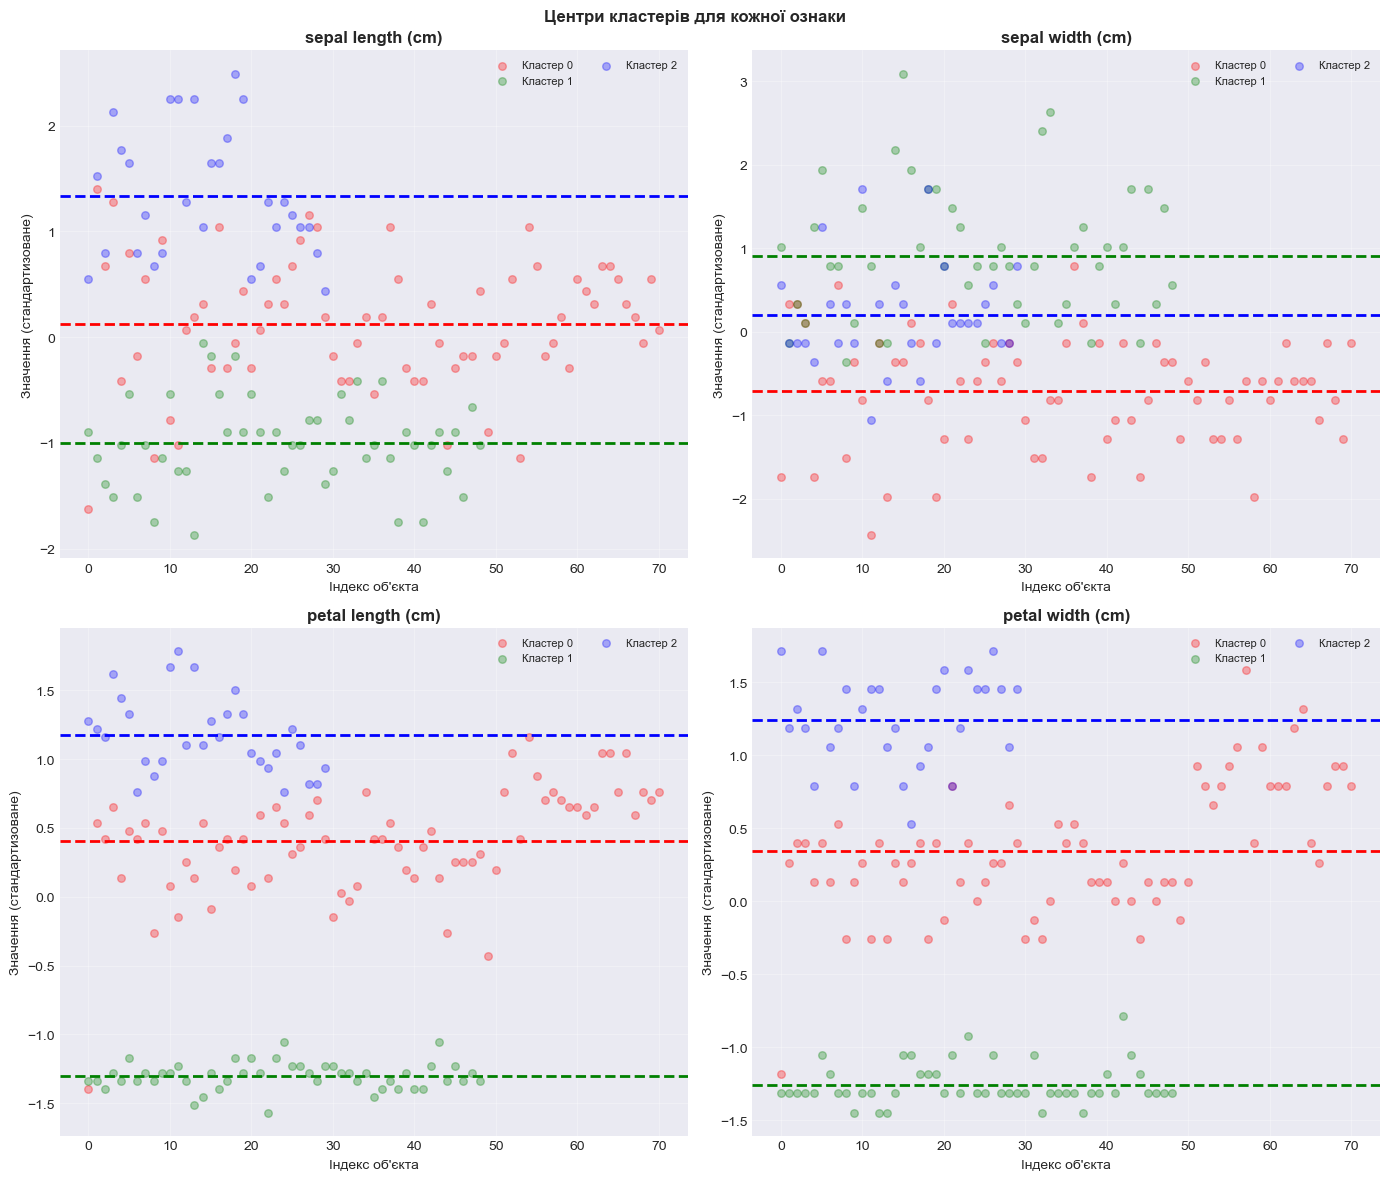

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from itertools import combinations
import time
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*70)
print("КРОК 3-4: ПОБУДОВА БАЗОВОЇ МОДЕЛІ BIRCH ТА ВІЗУАЛІЗАЦІЯ")
print("="*70)



# ============================================================================
# КРОК 3: ПОБУДОВА БАЗОВОЇ МОДЕЛІ
# ============================================================================

print("\n" + "-"*70)
print("СТАНДАРТИЗАЦІЯ ТА НАВЧАННЯ МОДЕЛІ")
print("-"*70)

# Стандартизація
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Базова модель BIRCH
birch_base = Birch(n_clusters=3, threshold=0.5, branching_factor=50)

start_time = time.time()
labels_base = birch_base.fit_predict(X_scaled)
training_time = time.time() - start_time

print(f"\nЧас навчання: {training_time:.6f} сек")
print(f"Кількість кластерів: {len(np.unique(labels_base))}")
print(f"Розподіл об'єктів: {np.bincount(labels_base)}")

# ============================================================================
# КРОК 4: ВІЗУАЛІЗАЦІЯ
# ============================================================================

print("\n" + "-"*70)
print("ВІЗУАЛІЗАЦІЯ РЕЗУЛЬТАТІВ")
print("-"*70)

# PCA для візуалізації
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

colors = ['red', 'green', 'blue']
target_names = ['Setosa', 'Versicolor', 'Virginica']

# 1. Порівняння з реальними класами (PCA 2D)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for cluster_id in np.unique(labels_base):
    mask = labels_base == cluster_id
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[cluster_id],
                   label=f'Кластер {cluster_id}', alpha=0.6, edgecolors='k', s=80)

axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
axes[0].set_title('Результати кластеризації BIRCH', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for class_id in np.unique(y):
    mask = y == class_id
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[class_id],
                   label=target_names[class_id], alpha=0.6, edgecolors='k', s=80)

axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
axes[1].set_title('Реальні класи', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Порівняння результатів кластеризації (PCA 2D)', fontweight='bold')
plt.tight_layout()
plt.savefig(script_directory / 'iris_08_birch_base_pca.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Всі пари ознак
feature_pairs = list(combinations(range(len(feature_columns)), 2))
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (i, j) in enumerate(feature_pairs):
    for cluster_id in np.unique(labels_base):
        mask = labels_base == cluster_id
        axes[idx].scatter(X_scaled[mask, i], X_scaled[mask, j], c=colors[cluster_id],
                         label=f'Кластер {cluster_id}', alpha=0.6, edgecolors='k', s=60)
    
    axes[idx].set_xlabel(feature_columns[i])
    axes[idx].set_ylabel(feature_columns[j])
    axes[idx].set_title(f'{feature_columns[i]} vs {feature_columns[j]}', fontweight='bold')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Результати кластеризації для всіх пар ознак', fontweight='bold')
plt.tight_layout()
plt.savefig(script_directory / 'iris_09_birch_all_pairs.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Confusion Matrix
cm = confusion_matrix(y, labels_base)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Кластер {i}' for i in range(3)],
            yticklabels=target_names, ax=axes[0])
axes[0].set_xlabel('Передбачений кластер')
axes[0].set_ylabel('Реальний клас')
axes[0].set_title('Confusion Matrix (абсолютні)', fontweight='bold')

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_normalized, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=[f'Кластер {i}' for i in range(3)],
            yticklabels=target_names, ax=axes[1])
axes[1].set_xlabel('Передбачений кластер')
axes[1].set_ylabel('Реальний клас')
axes[1].set_title('Confusion Matrix (%)', fontweight='bold')

plt.tight_layout()
plt.savefig(script_directory / 'iris_10_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nАналіз відповідності:")
for cluster_id in np.unique(labels_base):
    mask = labels_base == cluster_id
    classes = y[mask]
    unique, counts = np.unique(classes, return_counts=True)
    dominant = unique[np.argmax(counts)]
    percentage = (np.max(counts) / len(classes)) * 100
    print(f"Кластер {cluster_id} -> {target_names[dominant]} ({percentage:.1f}%)")

# 4. 3D візуалізація
fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(121, projection='3d')
for cluster_id in np.unique(labels_base):
    mask = labels_base == cluster_id
    ax1.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
               c=colors[cluster_id], label=f'Кластер {cluster_id}',
               alpha=0.6, edgecolors='k', s=50)
ax1.set_title('Кластеризація BIRCH', fontweight='bold')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
for class_id in np.unique(y):
    mask = y == class_id
    ax2.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
               c=colors[class_id], label=target_names[class_id],
               alpha=0.6, edgecolors='k', s=50)
ax2.set_title('Реальні класи', fontweight='bold')
ax2.legend()

plt.suptitle('3D Візуалізація (PCA)', fontweight='bold')
plt.tight_layout()
plt.savefig(script_directory / 'iris_11_birch_3d.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Центри кластерів
cluster_centers = np.array([X_scaled[labels_base == i].mean(axis=0) for i in range(3)])

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx in range(len(feature_columns)):
    for cluster_id in np.unique(labels_base):
        mask = labels_base == cluster_id
        axes[idx].scatter(range(np.sum(mask)), X_scaled[mask, idx],
                         c=colors[cluster_id], alpha=0.3, s=30,
                         label=f'Кластер {cluster_id}')
    
    for cluster_id in range(3):
        axes[idx].axhline(y=cluster_centers[cluster_id, idx],
                         color=colors[cluster_id], linestyle='--', linewidth=2)
    
    axes[idx].set_xlabel('Індекс об\'єкта')
    axes[idx].set_ylabel('Значення (стандартизоване)')
    axes[idx].set_title(f'{feature_columns[idx]}', fontweight='bold')
    axes[idx].legend(fontsize=8, ncol=2)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Центри кластерів для кожної ознаки', fontweight='bold')
plt.tight_layout()
plt.savefig(script_directory / 'iris_12_cluster_centers.png', dpi=300, bbox_inches='tight')
plt.show()





КРОК 5: ОЦІНКА ШВИДКОДІЇ АЛГОРИТМУ BIRCH

----------------------------------------------------------------------
БАЗОВИЙ НАБІР (150 зразків)
----------------------------------------------------------------------
Середній час: 2.9012 мс
Стандартне відхилення: 0.5422 мс
Min: 2.4483 мс, Max: 4.7753 мс

----------------------------------------------------------------------
ТЕСТУВАННЯ НА ВЕЛИКИХ НАБОРАХ
----------------------------------------------------------------------

Генерація 1,000 зразків...


  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.

Час кластеризації: 0.1027 сек (102.66 мс)
Час на зразок: 102.66 мкс

Генерація 5,000 зразків...
Час кластеризації: 0.1615 сек (161.51 мс)
Час на зразок: 32.30 мкс

Генерація 10,000 зразків...
Час кластеризації: 0.2817 сек (281.68 мс)
Час на зразок: 28.17 мкс

Генерація 50,000 зразків...
Час кластеризації: 1.3032 сек (1303.19 мс)
Час на зразок: 26.06 мкс

Генерація 100,000 зразків...
Час кластеризації: 2.4711 сек (2471.06 мс)
Час на зразок: 24.71 мкс

Генерація 500,000 зразків...
Час кластеризації: 12.1894 сек (12189.40 мс)
Час на зразок: 24.38 мкс

----------------------------------------------------------------------
ЗВЕДЕНА ТАБЛИЦЯ РЕЗУЛЬТАТІВ
----------------------------------------------------------------------
 n_samples      time  time_per_sample
      1000  0.102664       102.664471
      5000  0.161508        32.301664
     10000  0.281684        28.168360
     50000  1.303195        26.063900
    100000  2.471058        24.710577
    500000 12.189403        24.378805

--------

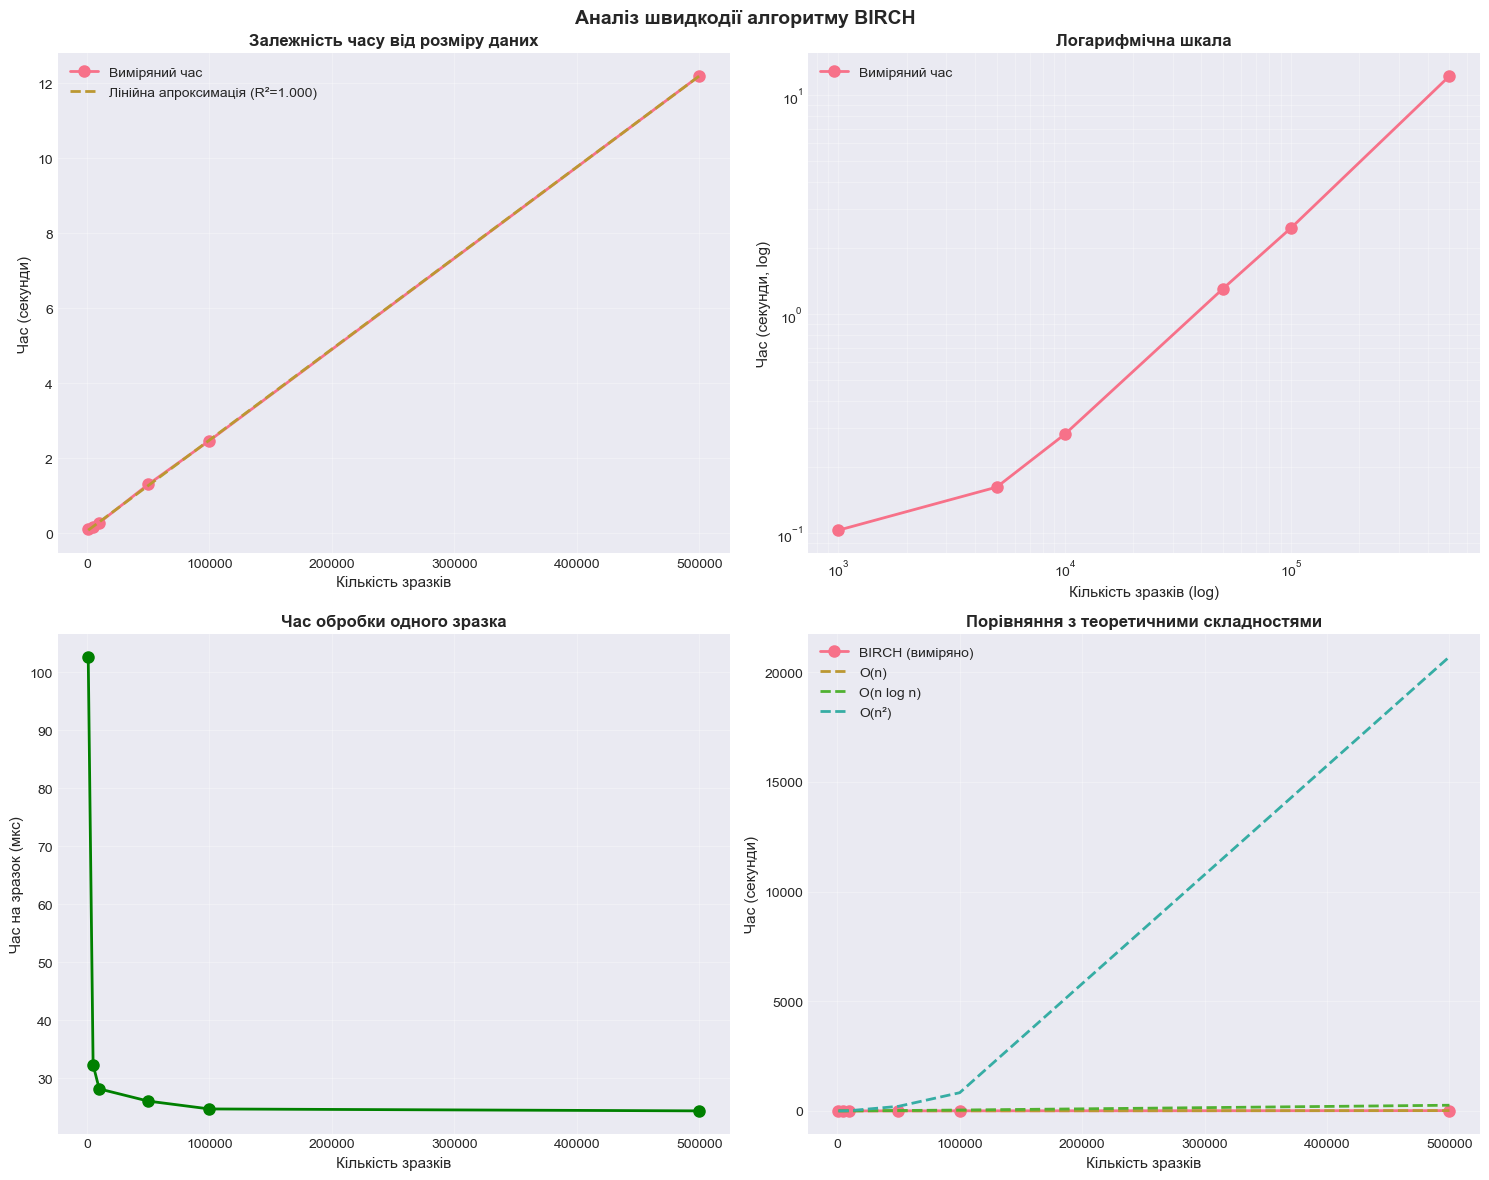

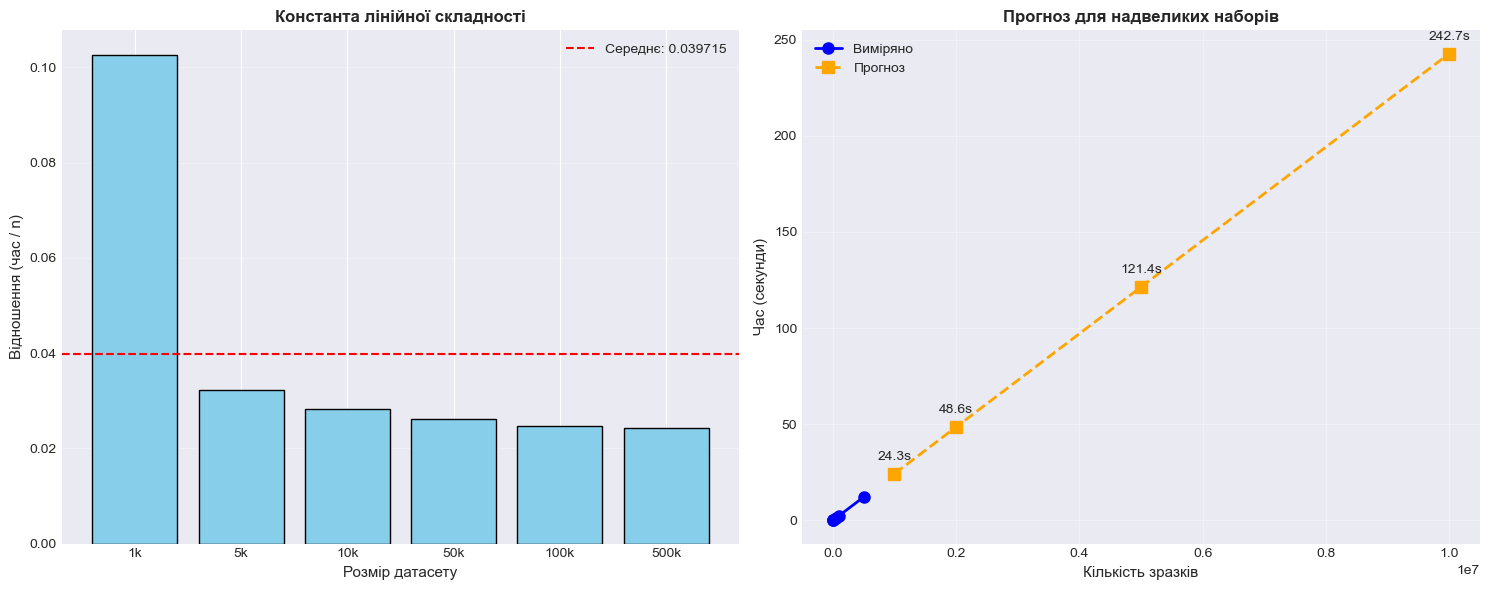


----------------------------------------------------------------------
ПРОГНОЗИ ДЛЯ НАДВЕЛИКИХ НАБОРІВ
----------------------------------------------------------------------
n=1,000,000 (1M): ~24.32 сек (0.41 хв)
n=2,000,000 (2M): ~48.58 сек (0.81 хв)
n=5,000,000 (5M): ~121.37 сек (2.02 хв)
n=10,000,000 (10M): ~242.67 сек (4.04 хв)

----------------------------------------------------------------------
ВИСНОВКИ ПРО ШВИДКОДІЮ
----------------------------------------------------------------------

1. Базовий набір (150): 2.9012 мс
2. Масштабованість: алгоритм демонструє лінійну складність O(n)
3. R² = 1.0000 - відмінна відповідність лінійній моделі
4. Час на зразок стабілізується на рівні ~39.71 мкс
5. Для 1M зразків прогнозований час: ~24.32 сек
6. Алгоритм BIRCH підходить для надвеликих наборів даних

Порівняння з іншими алгоритмами:
- K-Means: O(n * k * i) - де k кластерів, i ітерацій
- Agglomerative: O(n³) - дуже повільно для великих n
- DBSCAN: O(n log n) - швидко, але складно нала

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import time
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')

print("="*70)
print("КРОК 5: ОЦІНКА ШВИДКОДІЇ АЛГОРИТМУ BIRCH")
print("="*70)



# ============================================================================
# ВИМІРЮВАННЯ ЧАСУ НА БАЗОВОМУ НАБОРІ
# ============================================================================

print("\n" + "-"*70)
print("БАЗОВИЙ НАБІР (150 зразків)")
print("-"*70)

birch = Birch(n_clusters=3, threshold=0.5, branching_factor=50)

# Багаторазове вимірювання для точності
n_iterations = 100
times = []

for _ in range(n_iterations):
    start = time.time()
    birch.fit(X_scaled)
    times.append(time.time() - start)

base_time_mean = np.mean(times)
base_time_std = np.std(times)

print(f"Середній час: {base_time_mean*1000:.4f} мс")
print(f"Стандартне відхилення: {base_time_std*1000:.4f} мс")
print(f"Min: {min(times)*1000:.4f} мс, Max: {max(times)*1000:.4f} мс")

# ============================================================================
# ТЕСТУВАННЯ НА ВЕЛИКИХ НАБОРАХ
# ============================================================================

print("\n" + "-"*70)
print("ТЕСТУВАННЯ НА ВЕЛИКИХ НАБОРАХ")
print("-"*70)

# Розміри для тестування
sizes = [1000, 5000, 10000, 50000, 100000, 500000]
results = []

for n_samples in sizes:
    print(f"\nГенерація {n_samples:,} зразків...")
    
    # Створення синтетичних даних схожої структури
    X_large, _ = make_classification(
        n_samples=n_samples,
        n_features=4,
        n_informative=4,
        n_redundant=0,
        n_clusters_per_class=1,
        n_classes=3,
        random_state=42
    )
    
    # Стандартизація
    X_large_scaled = StandardScaler().fit_transform(X_large)
    
    # Вимірювання часу (3 запуски для надійності)
    times_large = []
    for _ in range(3):
        start = time.time()
        birch.fit(X_large_scaled)
        times_large.append(time.time() - start)
    
    mean_time = np.mean(times_large)
    
    results.append({
        'n_samples': n_samples,
        'time': mean_time,
        'time_per_sample': mean_time / n_samples * 1000000  # мікросекунди
    })
    
    print(f"Час кластеризації: {mean_time:.4f} сек ({mean_time*1000:.2f} мс)")
    print(f"Час на зразок: {mean_time/n_samples*1000000:.2f} мкс")

results_df = pd.DataFrame(results)

print("\n" + "-"*70)
print("ЗВЕДЕНА ТАБЛИЦЯ РЕЗУЛЬТАТІВ")
print("-"*70)
print(results_df.to_string(index=False))

# ============================================================================
# АНАЛІЗ СКЛАДНОСТІ
# ============================================================================

print("\n" + "-"*70)
print("АНАЛІЗ СКЛАДНОСТІ АЛГОРИТМУ")
print("-"*70)

# Відношення часу до лінійної складності
results_df['linear_ratio'] = results_df['time'] / (results_df['n_samples'] / 1000)

# Перевірка на лінійну складність
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(
    results_df['n_samples'], results_df['time']
)

print(f"\nЛінійна регресія: time = {slope:.8f} * n_samples + {intercept:.4f}")
print(f"R² (коефіцієнт детермінації): {r_value**2:.4f}")
print(f"Теоретична складність BIRCH: O(n)")

if r_value**2 > 0.95:
    print("Результат: Алгоритм демонструє ЛІНІЙНУ складність")
else:
    print("Результат: Складність відрізняється від лінійної")

# Обчислення прискорення відносно квадратичної складності
print("\nПорівняння з квадратичною складністю:")
for _, row in results_df.iterrows():
    n = row['n_samples']
    linear_estimate = slope * n + intercept
    quadratic_estimate = linear_estimate * (n / 1000)  # якби була O(n²)
    speedup = quadratic_estimate / row['time']
    print(f"n={n:,}: прискорення ~{speedup:.1f}x порівняно з O(n²)")

# ============================================================================
# ВІЗУАЛІЗАЦІЯ 1: ЧАС vs РОЗМІР
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Абсолютний час (лінійна шкала)
axes[0, 0].plot(results_df['n_samples'], results_df['time'], 
                'o-', linewidth=2, markersize=8, label='Виміряний час')
axes[0, 0].plot(results_df['n_samples'], 
                slope * results_df['n_samples'] + intercept,
                '--', linewidth=2, label=f'Лінійна апроксимація (R²={r_value**2:.3f})')
axes[0, 0].set_xlabel('Кількість зразків', fontsize=11)
axes[0, 0].set_ylabel('Час (секунди)', fontsize=11)
axes[0, 0].set_title('Залежність часу від розміру даних', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Логарифмічна шкала
axes[0, 1].loglog(results_df['n_samples'], results_df['time'], 
                  'o-', linewidth=2, markersize=8, label='Виміряний час')
axes[0, 1].set_xlabel('Кількість зразків (log)', fontsize=11)
axes[0, 1].set_ylabel('Час (секунди, log)', fontsize=11)
axes[0, 1].set_title('Логарифмічна шкала', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, which='both')

# 3. Час на один зразок
axes[1, 0].plot(results_df['n_samples'], results_df['time_per_sample'],
                'o-', linewidth=2, markersize=8, color='green')
axes[1, 0].set_xlabel('Кількість зразків', fontsize=11)
axes[1, 0].set_ylabel('Час на зразок (мкс)', fontsize=11)
axes[1, 0].set_title('Час обробки одного зразка', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Порівняння з різними складностями
n_range = np.array(results_df['n_samples'])
t_linear = slope * n_range + intercept
t_quadratic = t_linear[0] * (n_range / n_range[0]) ** 2
t_nlogn = t_linear[0] * (n_range / n_range[0]) * np.log(n_range / n_range[0] + 1)

axes[1, 1].plot(n_range, results_df['time'], 'o-', linewidth=2, 
                markersize=8, label='BIRCH (виміряно)')
axes[1, 1].plot(n_range, t_linear, '--', linewidth=2, label='O(n)')
axes[1, 1].plot(n_range, t_nlogn, '--', linewidth=2, label='O(n log n)')
axes[1, 1].plot(n_range, t_quadratic, '--', linewidth=2, label='O(n²)')
axes[1, 1].set_xlabel('Кількість зразків', fontsize=11)
axes[1, 1].set_ylabel('Час (секунди)', fontsize=11)
axes[1, 1].set_title('Порівняння з теоретичними складностями', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Аналіз швидкодії алгоритму BIRCH', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# ВІЗУАЛІЗАЦІЯ 2: ДЕТАЛІЗОВАНИЙ АНАЛІЗ
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Співвідношення з лінійною складністю
axes[0].bar(range(len(results_df)), results_df['linear_ratio'], 
            color='skyblue', edgecolor='black')
axes[0].set_xticks(range(len(results_df)))
axes[0].set_xticklabels([f'{n//1000}k' for n in results_df['n_samples']])
axes[0].set_xlabel('Розмір датасету', fontsize=11)
axes[0].set_ylabel('Відношення (час / n)', fontsize=11)
axes[0].set_title('Константа лінійної складності', fontweight='bold')
axes[0].axhline(y=results_df['linear_ratio'].mean(), color='red', 
                linestyle='--', label=f'Середнє: {results_df["linear_ratio"].mean():.6f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# 2. Прогноз для надвеликих наборів
future_sizes = [1000000, 2000000, 5000000, 10000000]
future_times = [slope * n + intercept for n in future_sizes]

all_sizes = list(results_df['n_samples']) + future_sizes
all_times = list(results_df['time']) + future_times

axes[1].plot(results_df['n_samples'], results_df['time'], 
             'o-', linewidth=2, markersize=8, label='Виміряно', color='blue')
axes[1].plot(future_sizes, future_times, 
             's--', linewidth=2, markersize=8, label='Прогноз', color='orange')
axes[1].set_xlabel('Кількість зразків', fontsize=11)
axes[1].set_ylabel('Час (секунди)', fontsize=11)
axes[1].set_title('Прогноз для надвеликих наборів', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Додавання міток для прогнозованих значень
for size, t in zip(future_sizes, future_times):
    axes[1].annotate(f'{t:.1f}s', (size, t), 
                    textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# ============================================================================
# ПРОГНОЗИ ТА ВИСНОВКИ
# ============================================================================

print("\n" + "-"*70)
print("ПРОГНОЗИ ДЛЯ НАДВЕЛИКИХ НАБОРІВ")
print("-"*70)

for size, predicted_time in zip(future_sizes, future_times):
    print(f"n={size:,} ({size/1000000:.0f}M): ~{predicted_time:.2f} сек ({predicted_time/60:.2f} хв)")

print("\n" + "-"*70)
print("ВИСНОВКИ ПРО ШВИДКОДІЮ")
print("-"*70)

print(f"""
1. Базовий набір (150): {base_time_mean*1000:.4f} мс
2. Масштабованість: алгоритм демонструє лінійну складність O(n)
3. R² = {r_value**2:.4f} - відмінна відповідність лінійній моделі
4. Час на зразок стабілізується на рівні ~{results_df['time_per_sample'].mean():.2f} мкс
5. Для 1M зразків прогнозований час: ~{future_times[0]:.2f} сек
6. Алгоритм BIRCH підходить для надвеликих наборів даних

Порівняння з іншими алгоритмами:
- K-Means: O(n * k * i) - де k кластерів, i ітерацій
- Agglomerative: O(n³) - дуже повільно для великих n
- DBSCAN: O(n log n) - швидко, але складно налаштувати
- BIRCH: O(n) - найкраща масштабованість
""")

print("="*70)
print("КРОК 5 ЗАВЕРШЕНО")
print("="*70)

КРОК 6: ПОБУДОВА АЛЬТЕРНАТИВНИХ МОДЕЛЕЙ BIRCH

----------------------------------------------------------------------
СТВОРЕННЯ АЛЬТЕРНАТИВНИХ МОДЕЛЕЙ
----------------------------------------------------------------------

Варбація параметра threshold:
  - threshold=0.1
  - threshold=0.3
  - threshold=0.7
  - threshold=1.0
  - threshold=1.5

Варіація параметра branching_factor:
  - branching_factor=20
  - branching_factor=30
  - branching_factor=70
  - branching_factor=100

Варіація параметра n_clusters:
  - n_clusters=2
  - n_clusters=4
  - n_clusters=5
  - n_clusters=6

  - Без AgglomerativeClustering (n_clusters=None)

Комбінації параметрів:
  - n_clust=3, thr=0.3, bf=30
  - n_clust=4, thr=0.7, bf=70
  - n_clust=2, thr=1.0, bf=50
  - n_clust=5, thr=0.3, bf=100

Загальна кількість моделей: 19

----------------------------------------------------------------------
НАВЧАННЯ МОДЕЛЕЙ ТА ЗБЕРЕЖЕННЯ РЕЗУЛЬТАТІВ
----------------------------------------------------------------------

[1/19] 

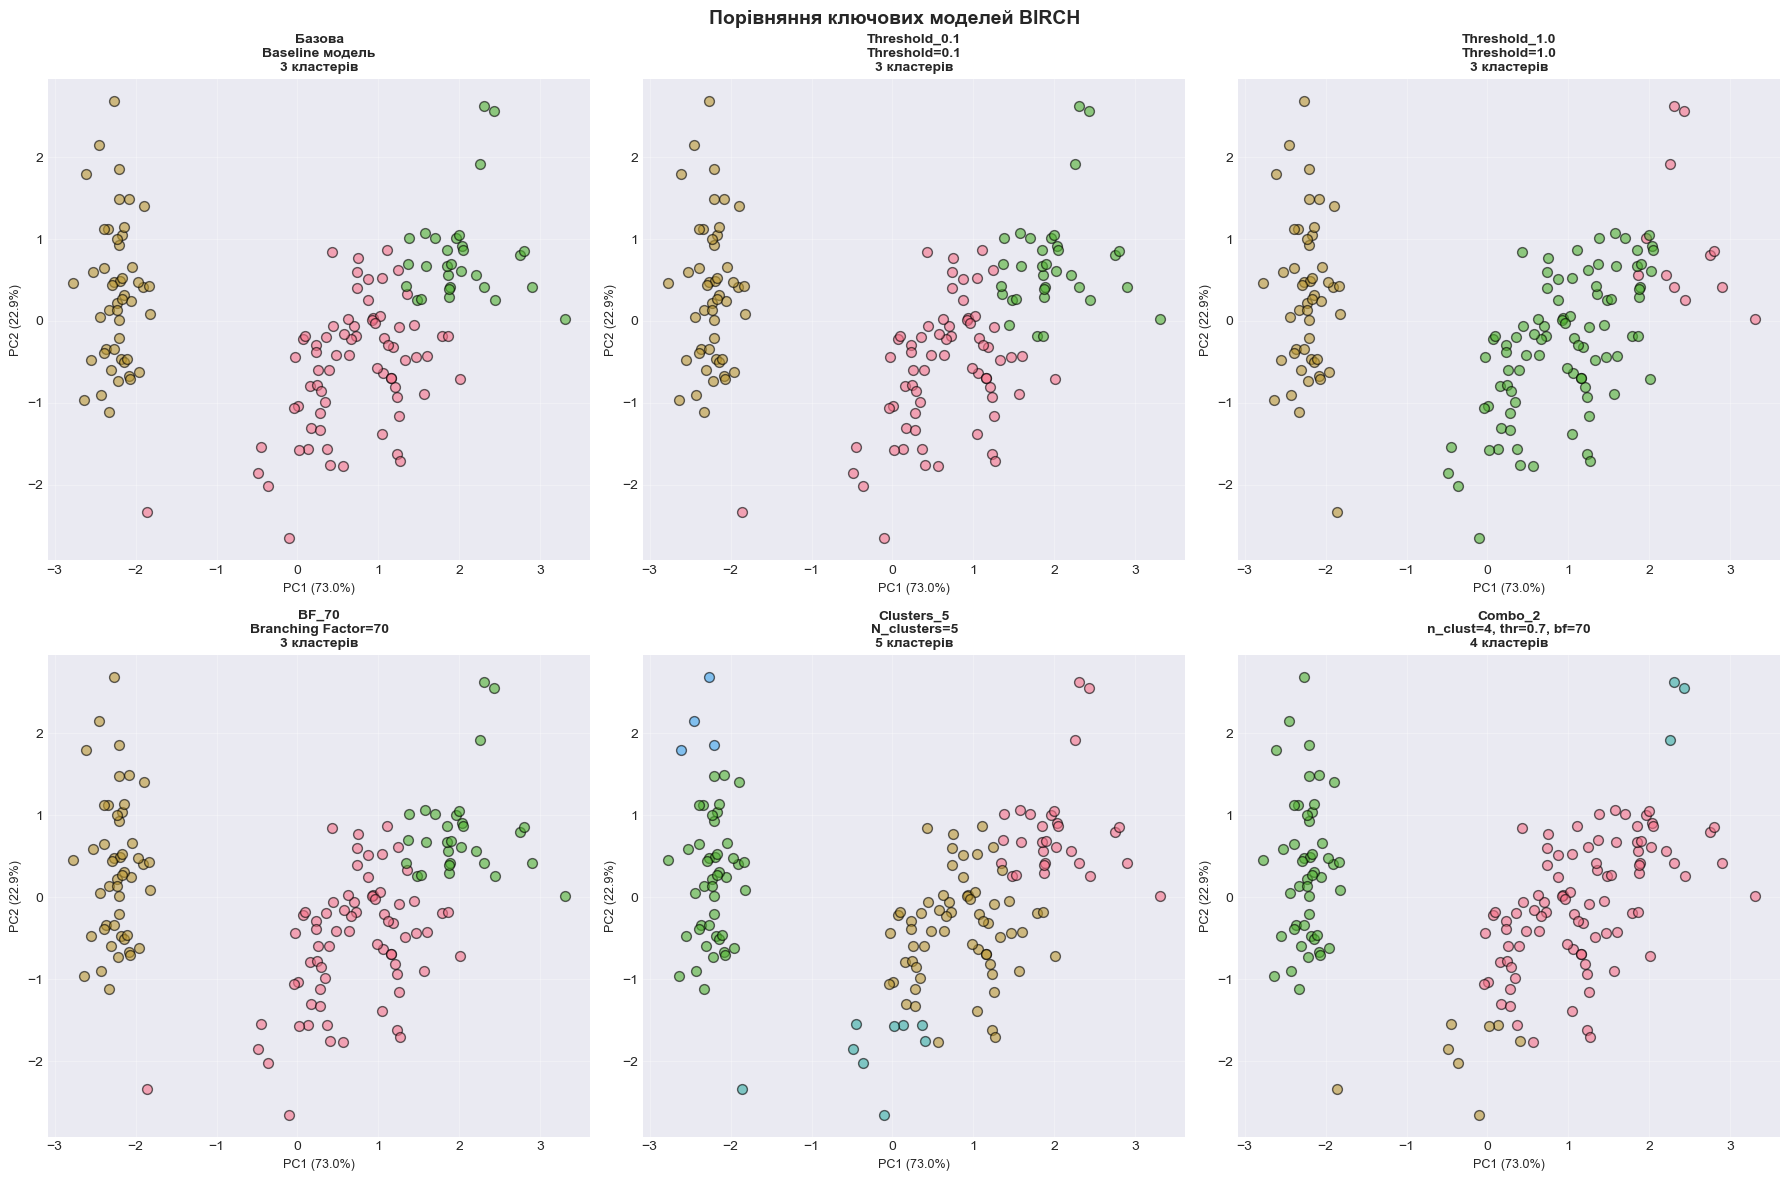

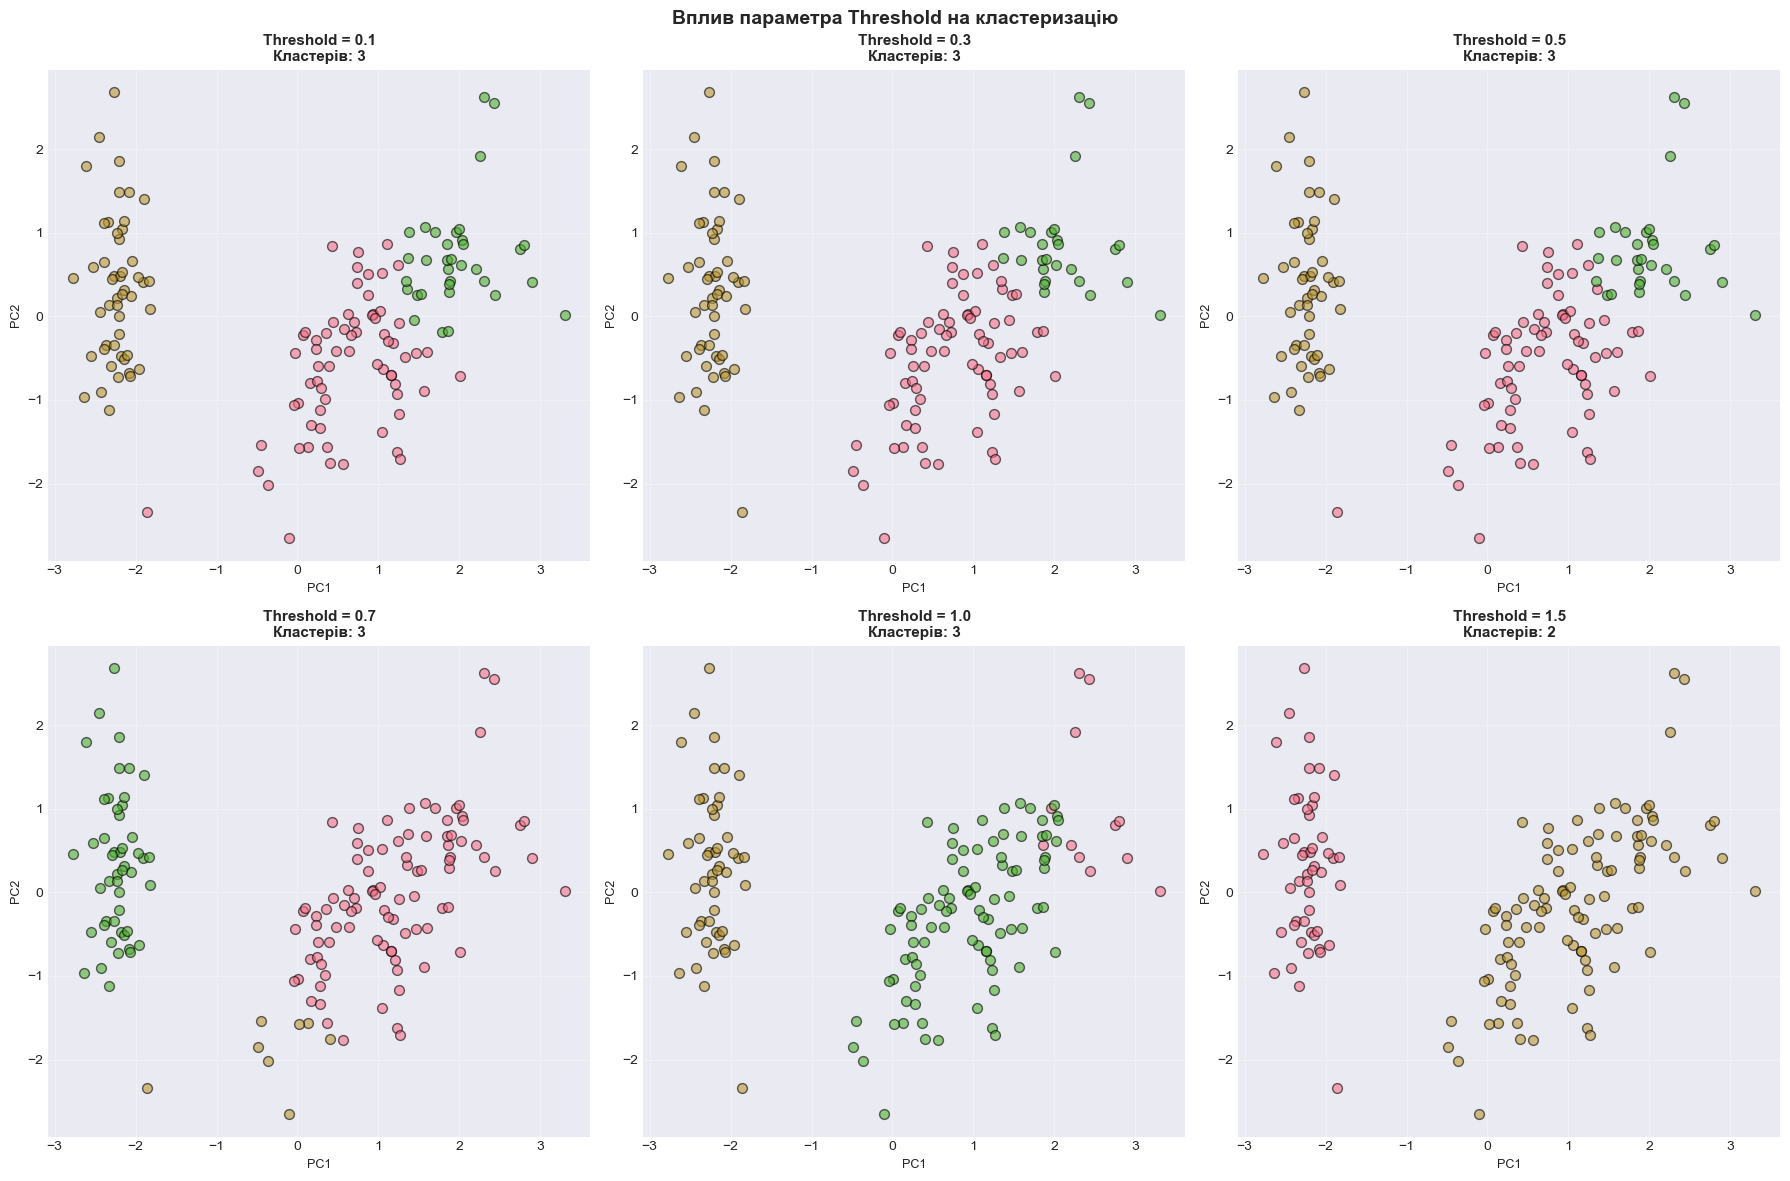

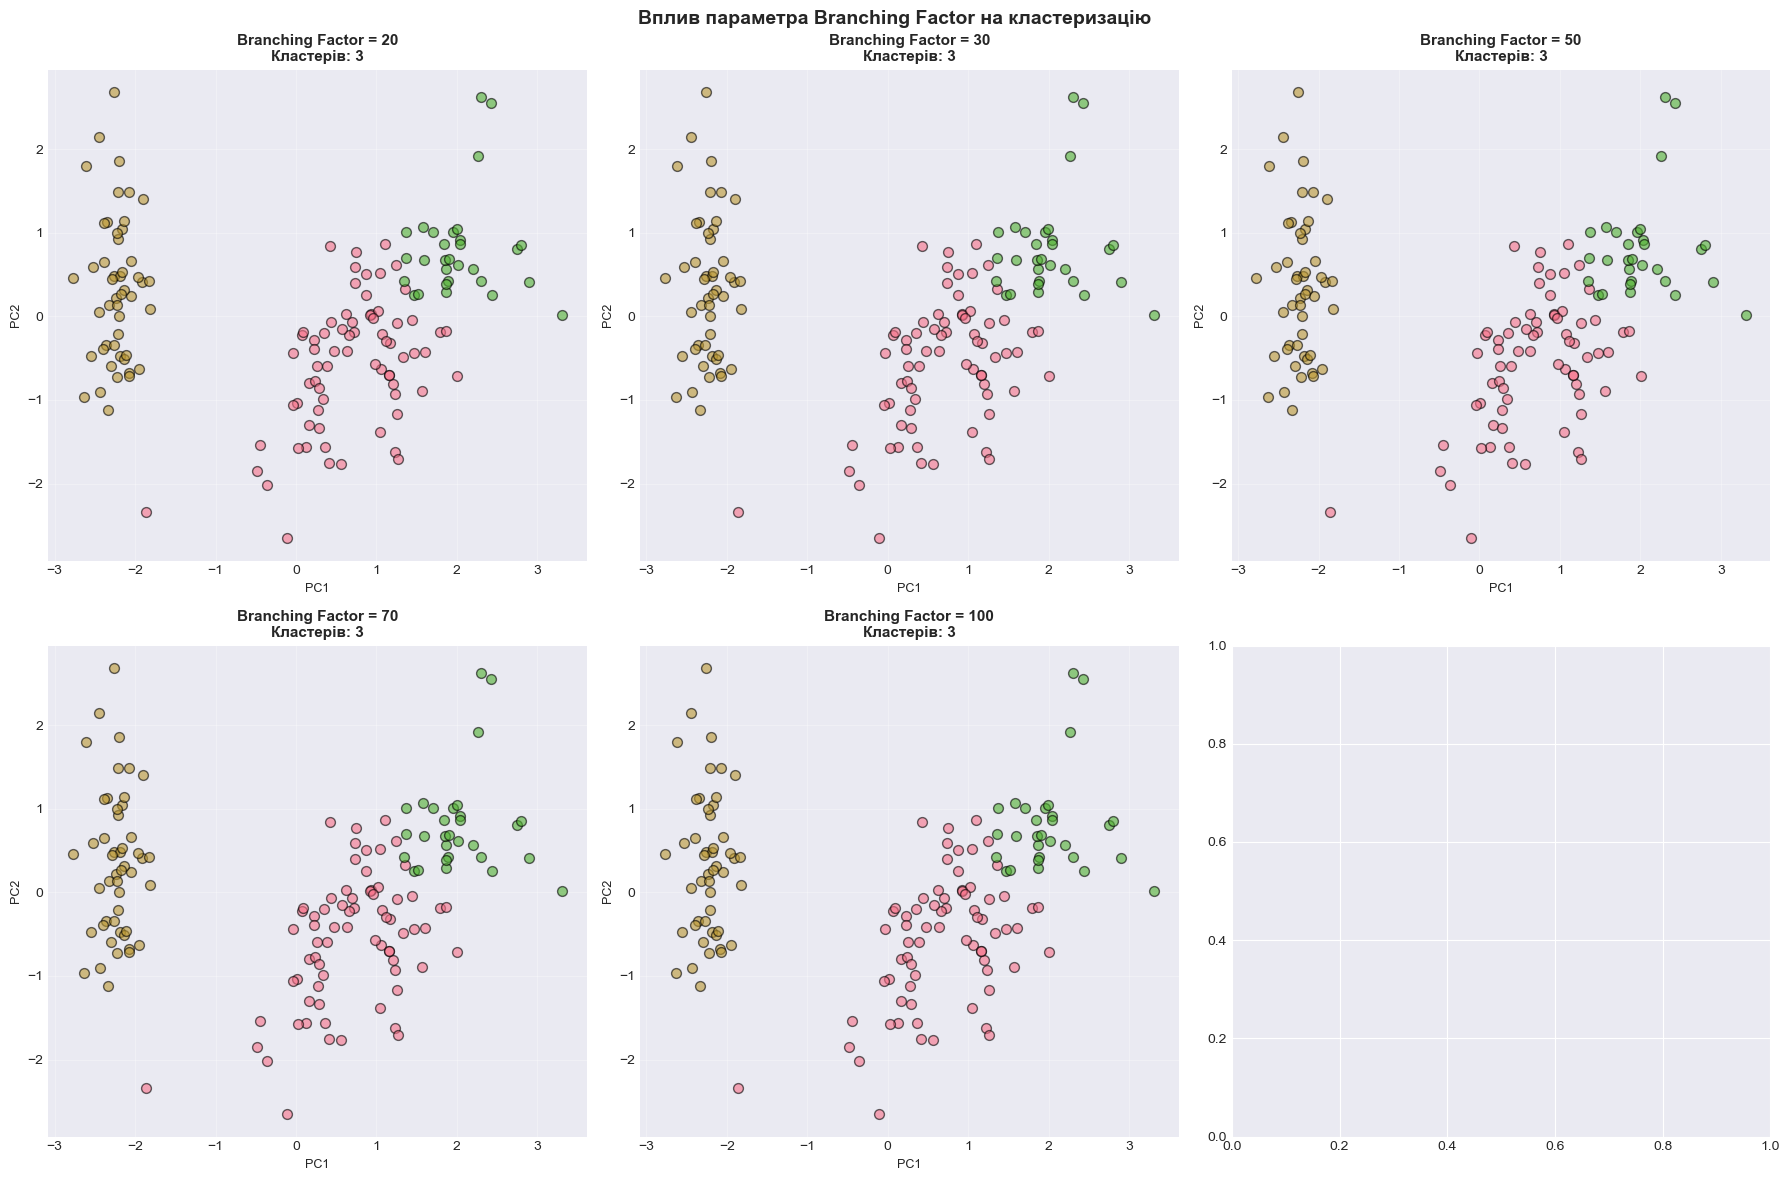

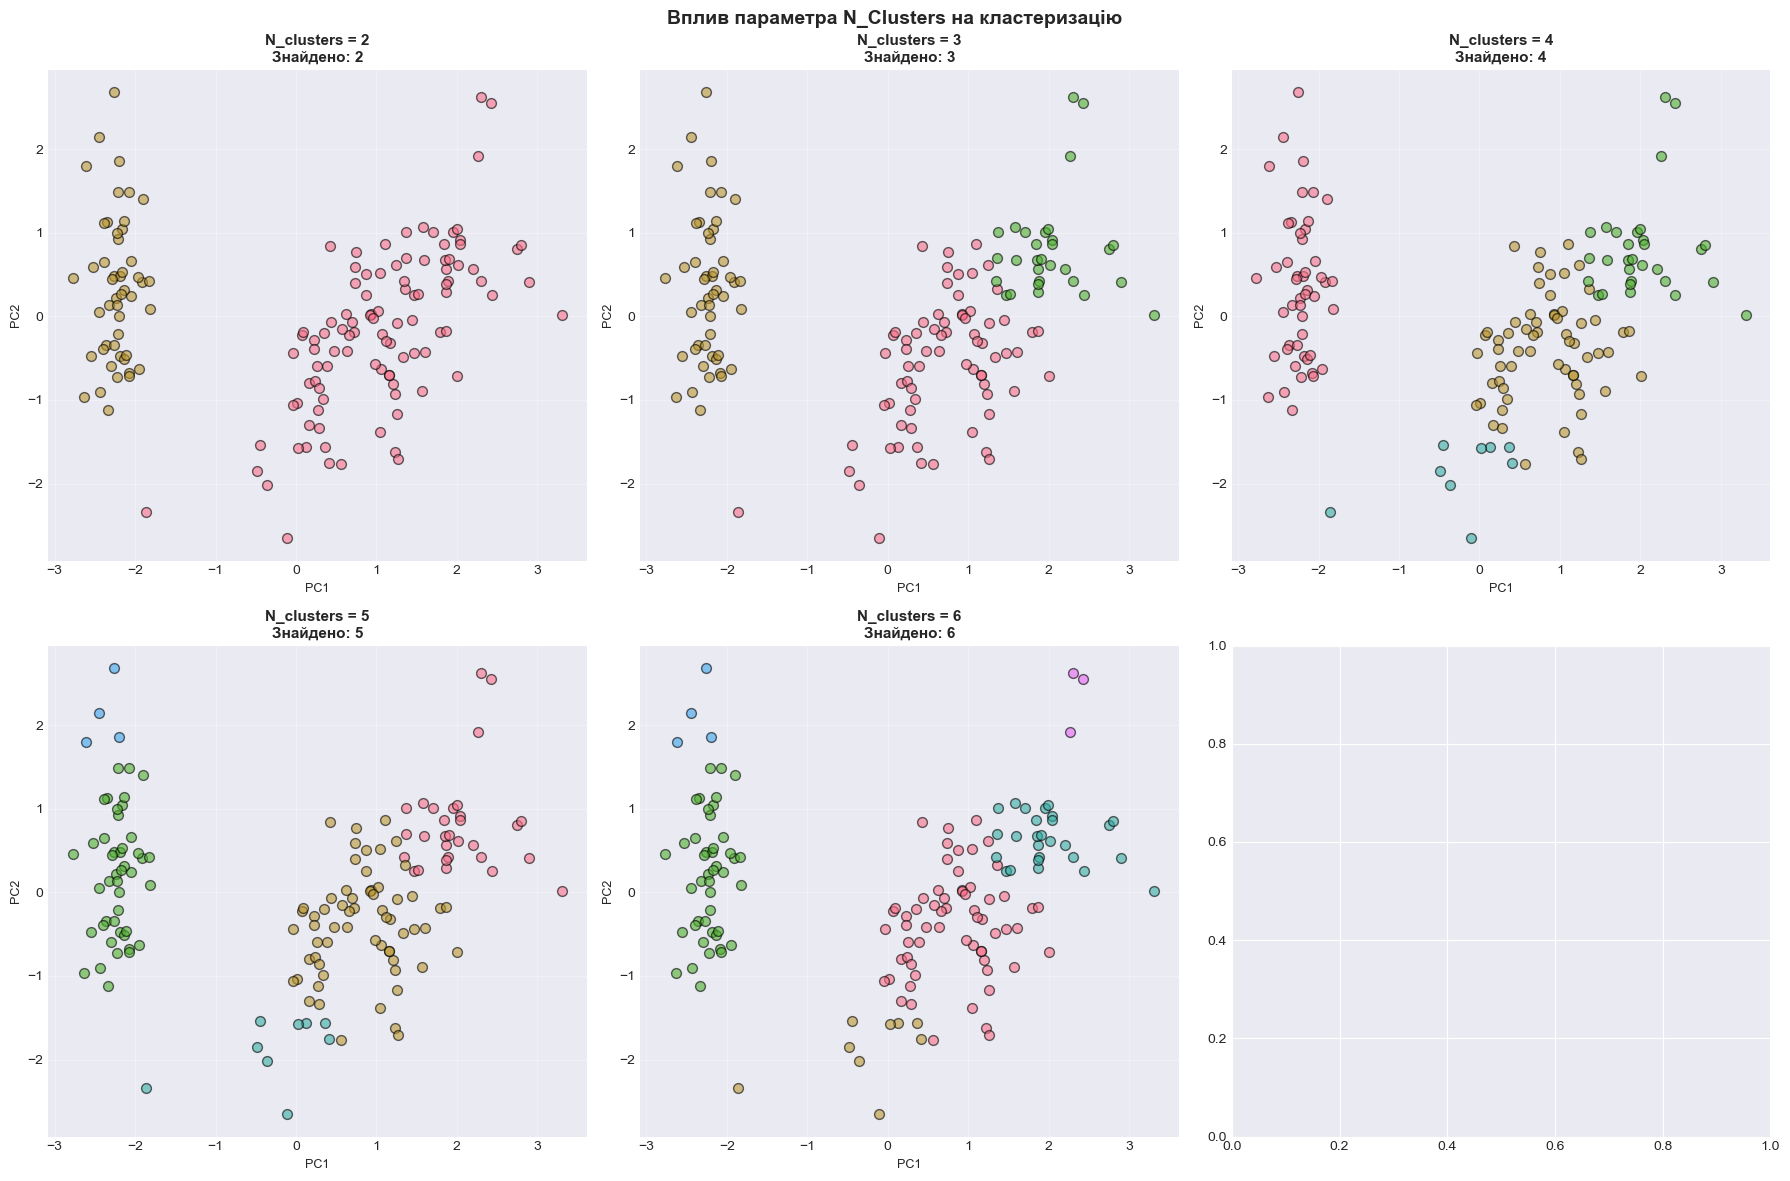

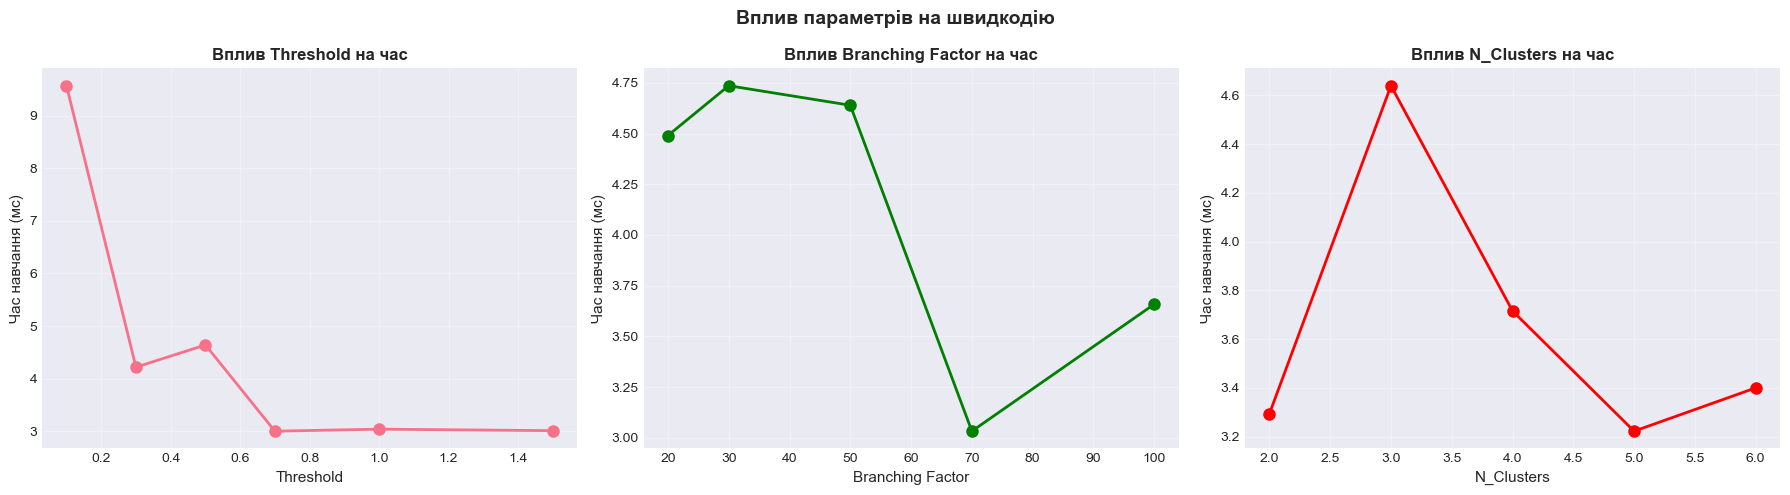

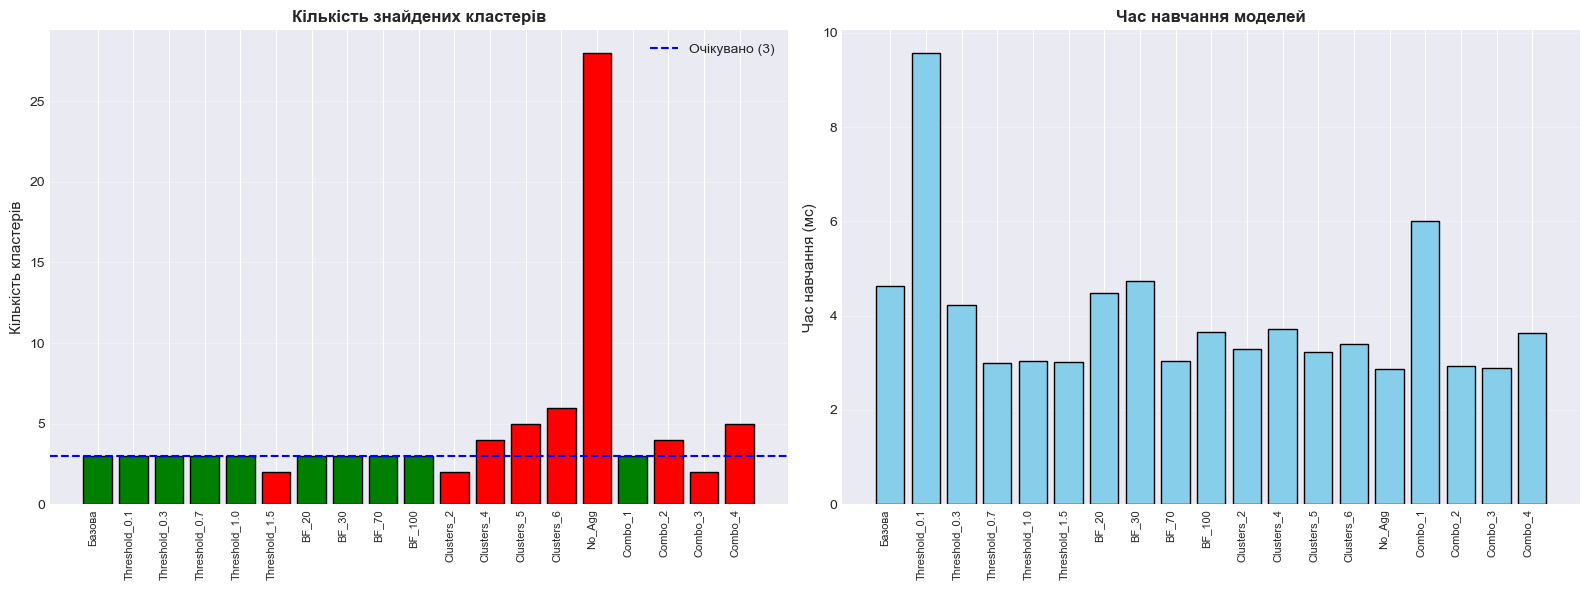


КРОК 6 ЗАВЕРШЕНО

Створено 19 альтернативних моделей
Результати збережено для розрахунку метрик на наступному кроці

Наступний крок: Розрахунок метрик якості кластеризації

Результати збережено у: birch_models_results.pkl


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')

print("="*70)
print("КРОК 6: ПОБУДОВА АЛЬТЕРНАТИВНИХ МОДЕЛЕЙ BIRCH")
print("="*70)



# PCA для візуалізації
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

# ============================================================================
# СТВОРЕННЯ АЛЬТЕРНАТИВНИХ МОДЕЛЕЙ
# ============================================================================

print("\n" + "-"*70)
print("СТВОРЕННЯ АЛЬТЕРНАТИВНИХ МОДЕЛЕЙ")
print("-"*70)

models = []

# 1. Базова модель (для порівняння)
models.append({
    'name': 'Базова',
    'params': {'n_clusters': 3, 'threshold': 0.5, 'branching_factor': 50},
    'description': 'Baseline модель'
})

# 2. Варіація threshold
print("\nВарбація параметра threshold:")
for threshold in [0.1, 0.3, 0.7, 1.0, 1.5]:
    models.append({
        'name': f'Threshold_{threshold}',
        'params': {'n_clusters': 3, 'threshold': threshold, 'branching_factor': 50},
        'description': f'Threshold={threshold}'
    })
    print(f"  - threshold={threshold}")

# 3. Варіація branching_factor
print("\nВаріація параметра branching_factor:")
for bf in [20, 30, 70, 100]:
    models.append({
        'name': f'BF_{bf}',
        'params': {'n_clusters': 3, 'threshold': 0.5, 'branching_factor': bf},
        'description': f'Branching Factor={bf}'
    })
    print(f"  - branching_factor={bf}")

# 4. Варіація кількості кластерів
print("\nВаріація параметра n_clusters:")
for n_clust in [2, 4, 5, 6]:
    models.append({
        'name': f'Clusters_{n_clust}',
        'params': {'n_clusters': n_clust, 'threshold': 0.5, 'branching_factor': 50},
        'description': f'N_clusters={n_clust}'
    })
    print(f"  - n_clusters={n_clust}")

# 5. Без AgglomerativeClustering
models.append({
    'name': 'No_Agg',
    'params': {'n_clusters': None, 'threshold': 0.5, 'branching_factor': 50},
    'description': 'Без AgglomerativeClustering'
})
print("\n  - Без AgglomerativeClustering (n_clusters=None)")

# 6. Комбінації параметрів
print("\nКомбінації параметрів:")
combinations = [
    {'n_clusters': 3, 'threshold': 0.3, 'branching_factor': 30},
    {'n_clusters': 4, 'threshold': 0.7, 'branching_factor': 70},
    {'n_clusters': 2, 'threshold': 1.0, 'branching_factor': 50},
    {'n_clusters': 5, 'threshold': 0.3, 'branching_factor': 100},
]

for i, params in enumerate(combinations, 1):
    models.append({
        'name': f'Combo_{i}',
        'params': params,
        'description': f"n_clust={params['n_clusters']}, thr={params['threshold']}, bf={params['branching_factor']}"
    })
    print(f"  - {models[-1]['description']}")

print(f"\nЗагальна кількість моделей: {len(models)}")

# ============================================================================
# НАВЧАННЯ ВСІХ МОДЕЛЕЙ
# ============================================================================

print("\n" + "-"*70)
print("НАВЧАННЯ МОДЕЛЕЙ ТА ЗБЕРЕЖЕННЯ РЕЗУЛЬТАТІВ")
print("-"*70)

results = []

for i, model_info in enumerate(models, 1):
    print(f"\n[{i}/{len(models)}] {model_info['name']}: {model_info['description']}")
    
    # Створення та навчання моделі
    birch = Birch(**model_info['params'])
    
    start_time = time.time()
    labels = birch.fit_predict(X_scaled)
    training_time = time.time() - start_time
    
    # Збереження результатів
    n_clusters_found = len(np.unique(labels))
    
    result = {
        'name': model_info['name'],
        'description': model_info['description'],
        'n_clusters_param': model_info['params']['n_clusters'],
        'threshold': model_info['params']['threshold'],
        'branching_factor': model_info['params']['branching_factor'],
        'n_clusters_found': n_clusters_found,
        'training_time': training_time,
        'labels': labels,
        'model': birch
    }
    
    results.append(result)
    
    print(f"  Час: {training_time*1000:.2f} мс, Кластерів знайдено: {n_clusters_found}")
    print(f"  Розподіл: {np.bincount(labels)}")

# Створення DataFrame з результатами
results_summary = pd.DataFrame([{
    'Назва': r['name'],
    'Опис': r['description'],
    'n_clusters': r['n_clusters_param'],
    'threshold': r['threshold'],
    'branching_factor': r['branching_factor'],
    'Знайдено кластерів': r['n_clusters_found'],
    'Час (мс)': r['training_time'] * 1000
} for r in results])

print("\n" + "-"*70)
print("ЗВЕДЕНА ТАБЛИЦЯ МОДЕЛЕЙ")
print("-"*70)
print(results_summary.to_string(index=False))

# ============================================================================
# ВІЗУАЛІЗАЦІЯ РЕЗУЛЬТАТІВ РІЗНИХ МОДЕЛЕЙ
# ============================================================================

print("\n" + "-"*70)
print("ВІЗУАЛІЗАЦІЯ РЕЗУЛЬТАТІВ")
print("-"*70)

# 1. Порівняння кількох ключових моделей на одному графіку
key_models_indices = [0, 1, 4, 8, 12, 16]  # Базова + деякі варіації
key_models = [results[i] for i in key_models_indices if i < len(results)]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, result in enumerate(key_models):
    labels = result['labels']
    n_unique = len(np.unique(labels))
    
    for cluster_id in np.unique(labels):
        mask = labels == cluster_id
        axes[idx].scatter(X_pca[mask, 0], X_pca[mask, 1],
                         alpha=0.6, edgecolors='k', s=50)
    
    axes[idx].set_title(f"{result['name']}\n{result['description']}\n{n_unique} кластерів",
                       fontsize=10, fontweight='bold')
    axes[idx].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=9)
    axes[idx].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Порівняння ключових моделей BIRCH', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Вплив параметра threshold
threshold_models = [r for r in results if r['name'].startswith('Threshold_') or r['name'] == 'Базова']
threshold_models = sorted(threshold_models, key=lambda x: x['threshold'])

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, result in enumerate(threshold_models[:6]):
    labels = result['labels']
    
    for cluster_id in np.unique(labels):
        mask = labels == cluster_id
        axes[idx].scatter(X_pca[mask, 0], X_pca[mask, 1],
                         alpha=0.6, edgecolors='k', s=50)
    
    axes[idx].set_title(f"Threshold = {result['threshold']}\nКластерів: {result['n_clusters_found']}",
                       fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(f'PC1', fontsize=9)
    axes[idx].set_ylabel(f'PC2', fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Вплив параметра Threshold на кластеризацію', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. Вплив параметра branching_factor
bf_models = [r for r in results if r['name'].startswith('BF_') or r['name'] == 'Базова']
bf_models = sorted(bf_models, key=lambda x: x['branching_factor'])

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, result in enumerate(bf_models[:6]):
    labels = result['labels']
    
    for cluster_id in np.unique(labels):
        mask = labels == cluster_id
        axes[idx].scatter(X_pca[mask, 0], X_pca[mask, 1],
                         alpha=0.6, edgecolors='k', s=50)
    
    axes[idx].set_title(f"Branching Factor = {result['branching_factor']}\nКластерів: {result['n_clusters_found']}",
                       fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(f'PC1', fontsize=9)
    axes[idx].set_ylabel(f'PC2', fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Вплив параметра Branching Factor на кластеризацію', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Вплив параметра n_clusters
nclust_models = [r for r in results if r['name'].startswith('Clusters_') or r['name'] == 'Базова']
nclust_models = sorted(nclust_models, key=lambda x: x['n_clusters_param'] if x['n_clusters_param'] else 0)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, result in enumerate(nclust_models[:6]):
    labels = result['labels']
    
    for cluster_id in np.unique(labels):
        mask = labels == cluster_id
        axes[idx].scatter(X_pca[mask, 0], X_pca[mask, 1],
                         alpha=0.6, edgecolors='k', s=50)
    
    axes[idx].set_title(f"N_clusters = {result['n_clusters_param']}\nЗнайдено: {result['n_clusters_found']}",
                       fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(f'PC1', fontsize=9)
    axes[idx].set_ylabel(f'PC2', fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Вплив параметра N_Clusters на кластеризацію', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. Аналіз часу навчання
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# За threshold
threshold_times = [(r['threshold'], r['training_time']*1000) for r in threshold_models]
threshold_times.sort()
axes[0].plot([t[0] for t in threshold_times], [t[1] for t in threshold_times], 
             'o-', linewidth=2, markersize=8)
axes[0].set_xlabel('Threshold', fontsize=11)
axes[0].set_ylabel('Час навчання (мс)', fontsize=11)
axes[0].set_title('Вплив Threshold на час', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# За branching_factor
bf_times = [(r['branching_factor'], r['training_time']*1000) for r in bf_models]
bf_times.sort()
axes[1].plot([t[0] for t in bf_times], [t[1] for t in bf_times], 
             'o-', linewidth=2, markersize=8, color='green')
axes[1].set_xlabel('Branching Factor', fontsize=11)
axes[1].set_ylabel('Час навчання (мс)', fontsize=11)
axes[1].set_title('Вплив Branching Factor на час', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# За n_clusters
nclust_times = [(r['n_clusters_param'] if r['n_clusters_param'] else 0, 
                 r['training_time']*1000) for r in nclust_models]
nclust_times.sort()
axes[2].plot([t[0] for t in nclust_times], [t[1] for t in nclust_times], 
             'o-', linewidth=2, markersize=8, color='red')
axes[2].set_xlabel('N_Clusters', fontsize=11)
axes[2].set_ylabel('Час навчання (мс)', fontsize=11)
axes[2].set_title('Вплив N_Clusters на час', fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.suptitle('Вплив параметрів на швидкодію', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 6. Загальне порівняння всіх моделей
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Кількість знайдених кластерів
model_names = [r['name'] for r in results]
n_clusters = [r['n_clusters_found'] for r in results]
colors_bar = ['red' if n != 3 else 'green' for n in n_clusters]

axes[0].bar(range(len(results)), n_clusters, color=colors_bar, edgecolor='black')
axes[0].set_xticks(range(len(results)))
axes[0].set_xticklabels(model_names, rotation=90, ha='right', fontsize=8)
axes[0].set_ylabel('Кількість кластерів', fontsize=11)
axes[0].set_title('Кількість знайдених кластерів', fontweight='bold')
axes[0].axhline(y=3, color='blue', linestyle='--', label='Очікувано (3)')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Час навчання
times = [r['training_time']*1000 for r in results]

axes[1].bar(range(len(results)), times, color='skyblue', edgecolor='black')
axes[1].set_xticks(range(len(results)))
axes[1].set_xticklabels(model_names, rotation=90, ha='right', fontsize=8)
axes[1].set_ylabel('Час навчання (мс)', fontsize=11)
axes[1].set_title('Час навчання моделей', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("КРОК 6 ЗАВЕРШЕНО")
print("="*70)
print(f"\nСтворено {len(results)} альтернативних моделей")
print("Результати збережено для розрахунку метрик на наступному кроці")
print("\nНаступний крок: Розрахунок метрик якості кластеризації")
print("="*70)

# Зберігаємо results у глобальній змінній для використання в наступних кроках
# (або можна зберегти у pickle файл)
import pickle
with open(script_directory / "data" / "birch_models_results.pkl", 'wb') as f:
    pickle.dump(results, f)
print("\nРезультати збережено у: birch_models_results.pkl")

КРОК 7: РОЗРАХУНОК МЕТРИК ЯКОСТІ КЛАСТЕРИЗАЦІЇ

Завантажено 19 моделей для оцінки

----------------------------------------------------------------------
РОЗРАХУНОК МЕТРИК
----------------------------------------------------------------------

[1/19] Базова
  Estimated Clusters: 3
  ARI: 0.6614
  AMI: 0.7296
  Silhouette: 0.4536

[2/19] Threshold_0.1
  Estimated Clusters: 3
  ARI: 0.6835
  AMI: 0.7212
  Silhouette: 0.4520

[3/19] Threshold_0.3
  Estimated Clusters: 3
  ARI: 0.6537
  AMI: 0.7457
  Silhouette: 0.4596

[4/19] Threshold_0.7
  Estimated Clusters: 3
  ARI: 0.5484
  AMI: 0.6739
  Silhouette: 0.4432

[5/19] Threshold_1.0
  Estimated Clusters: 3
  ARI: 0.5659
  AMI: 0.7004
  Silhouette: 0.4410

[6/19] Threshold_1.5
  Estimated Clusters: 2
  ARI: 0.5681
  AMI: 0.7316
  Silhouette: 0.5818

[7/19] BF_20
  Estimated Clusters: 3
  ARI: 0.6614
  AMI: 0.7296
  Silhouette: 0.4536

[8/19] BF_30
  Estimated Clusters: 3
  ARI: 0.6614
  AMI: 0.7296
  Silhouette: 0.4536

[9/19] BF_70
  Esti

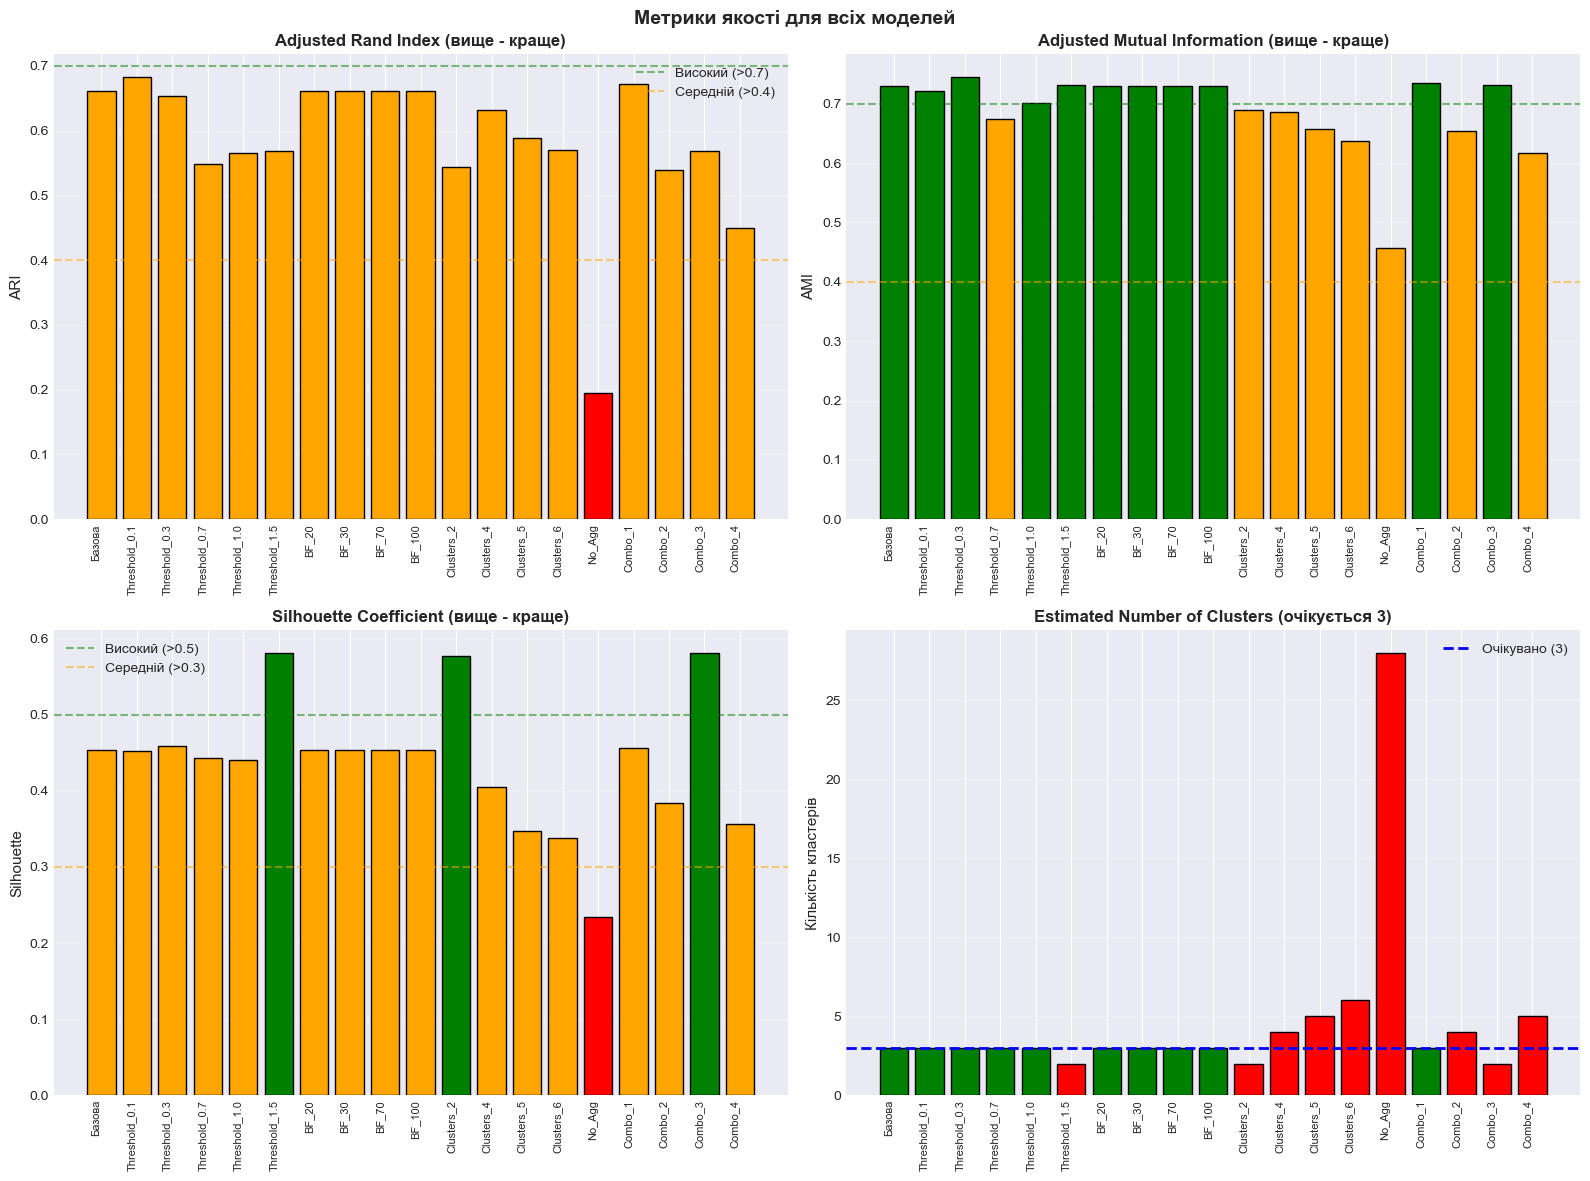

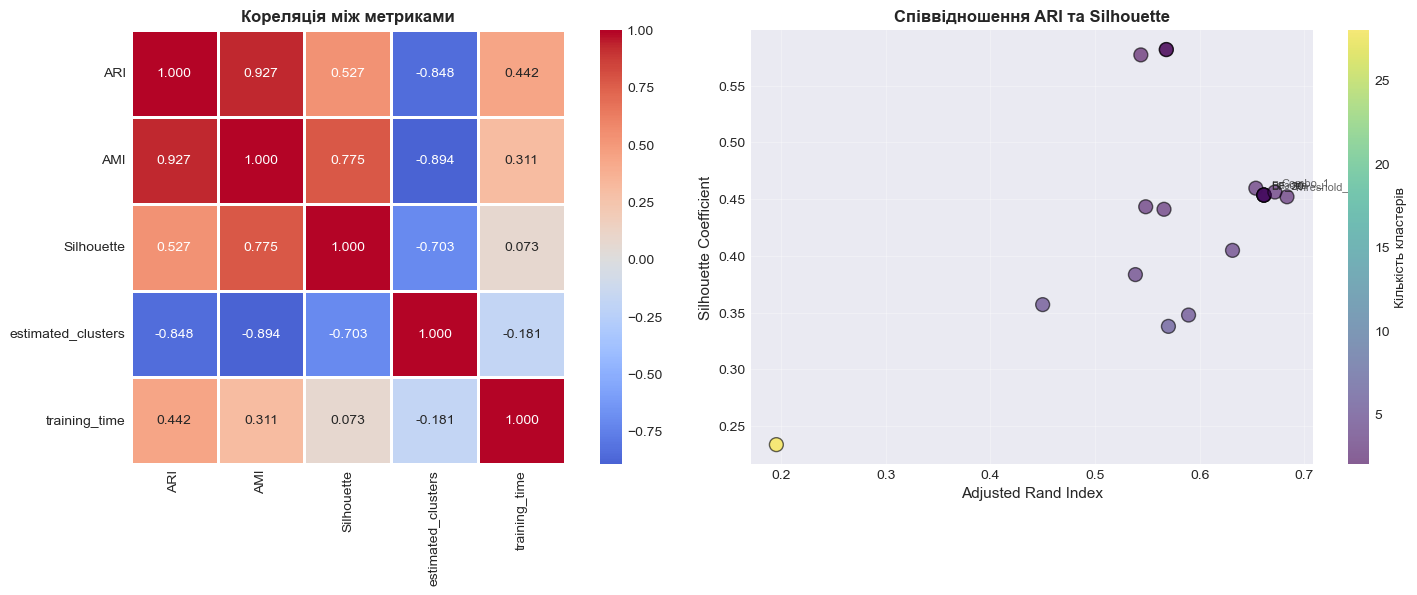

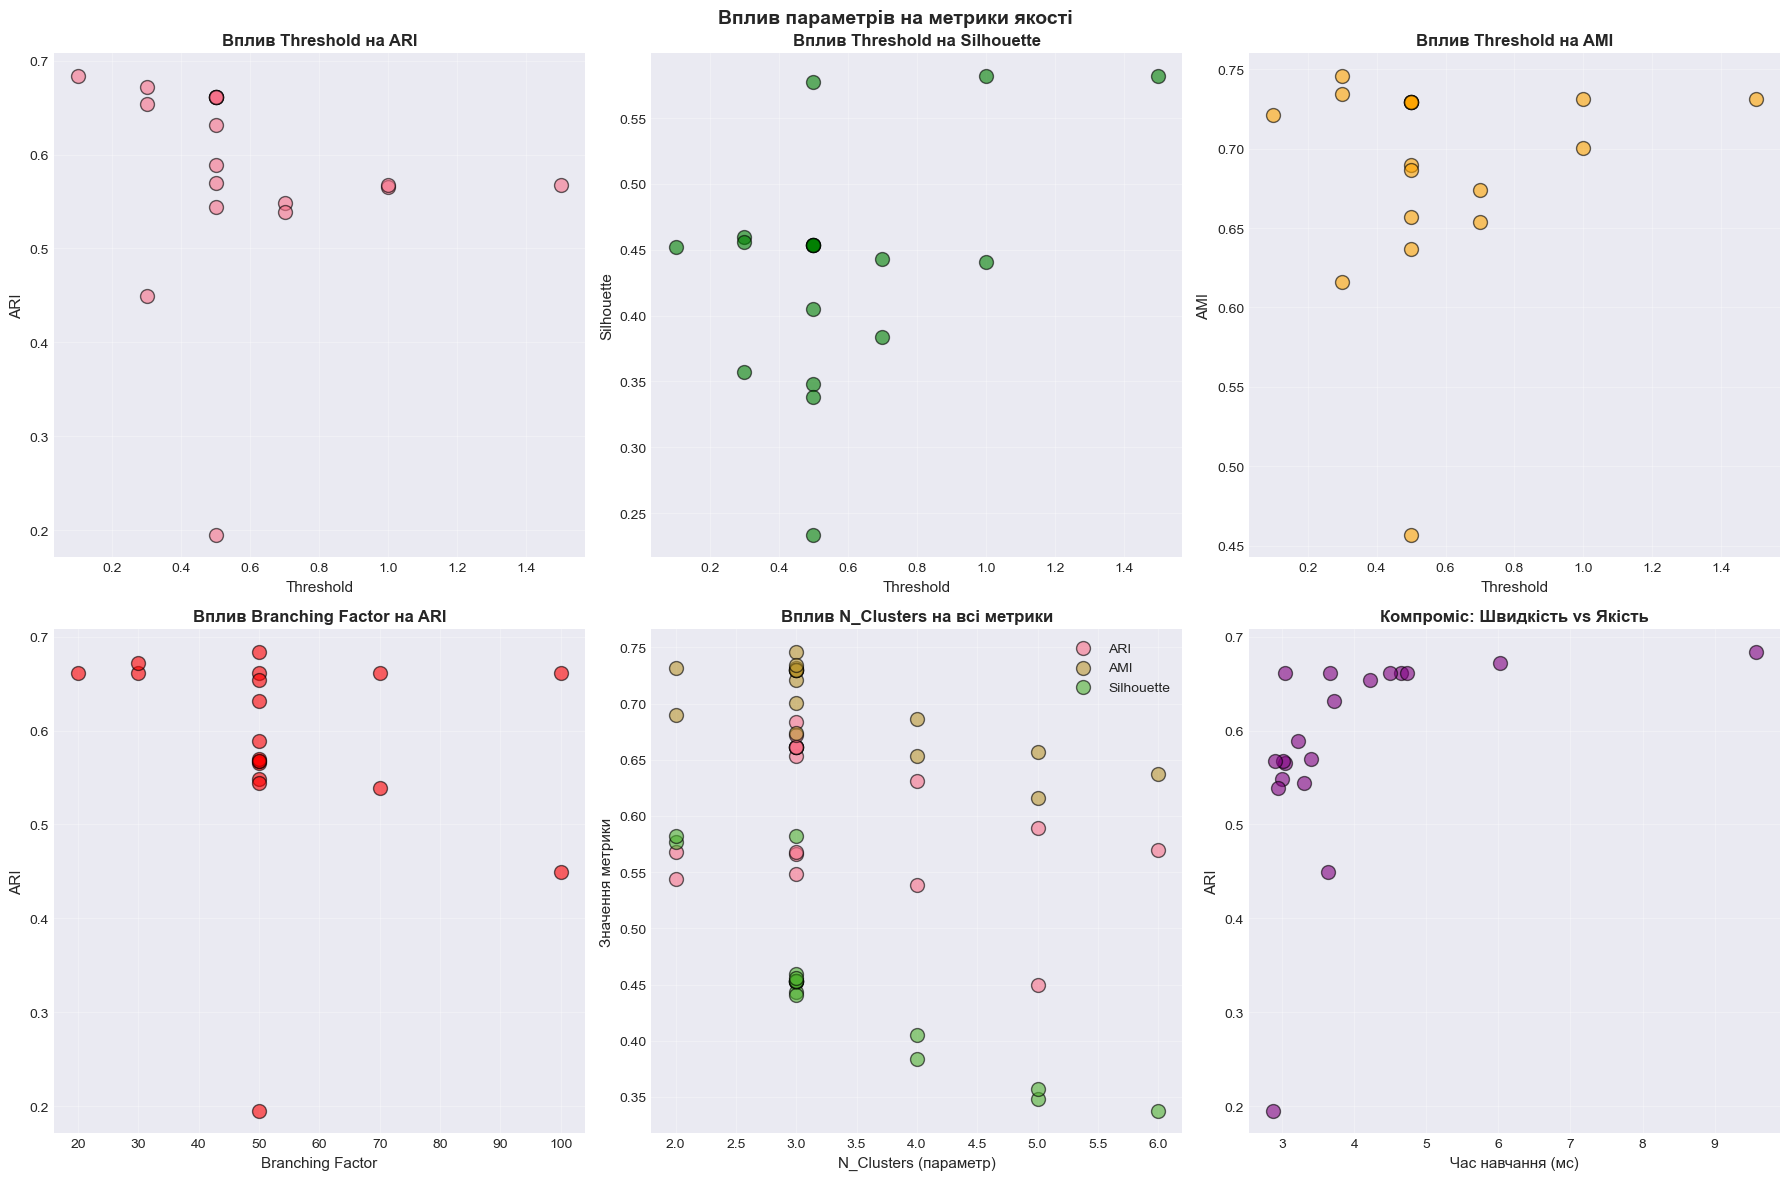

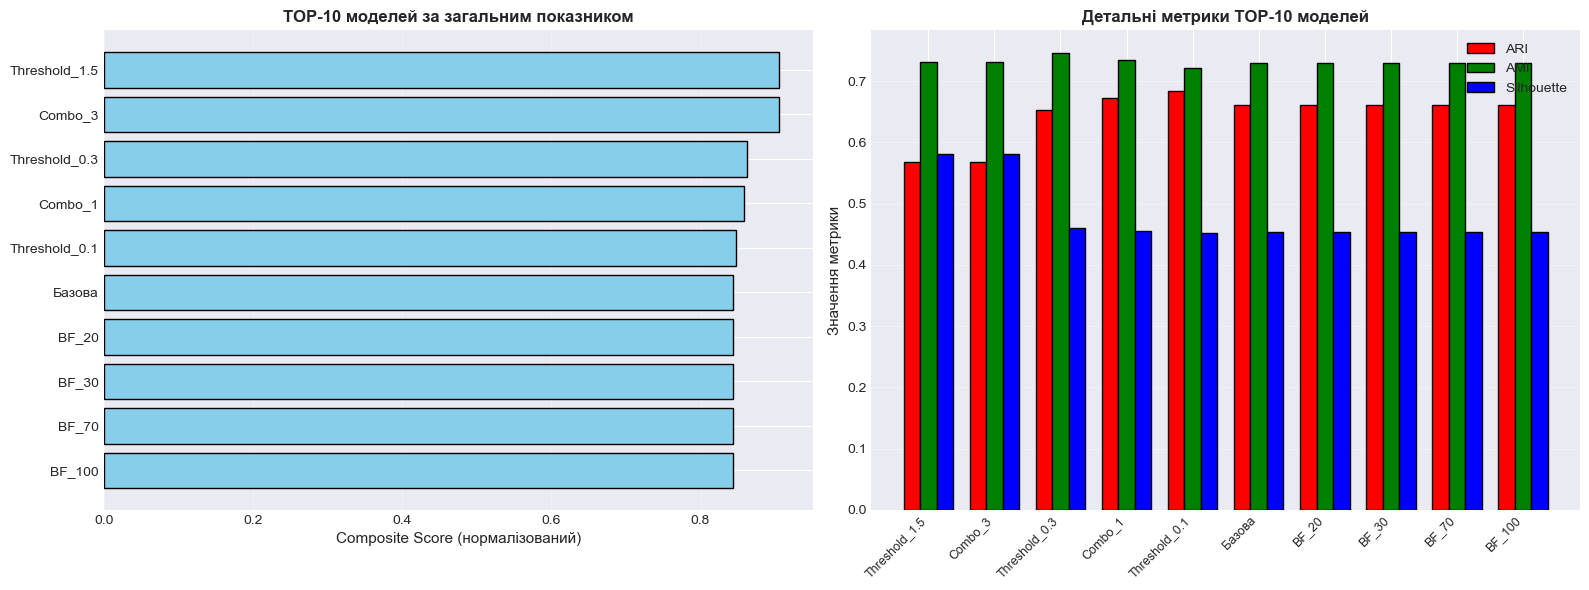


ВИСНОВКИ

ТОП-5 моделей за загальним показником:

1. Threshold_1.5
   Threshold=1.5
   ARI: 0.5681, AMI: 0.7316, Silhouette: 0.5818
   Composite Score: 0.9050

2. Combo_3
   n_clust=2, thr=1.0, bf=50
   ARI: 0.5681, AMI: 0.7316, Silhouette: 0.5818
   Composite Score: 0.9050

3. Threshold_0.3
   Threshold=0.3
   ARI: 0.6537, AMI: 0.7457, Silhouette: 0.4596
   Composite Score: 0.8627

4. Combo_1
   n_clust=3, thr=0.3, bf=30
   ARI: 0.6719, AMI: 0.7343, Silhouette: 0.4562
   Composite Score: 0.8588

5. Threshold_0.1
   Threshold=0.1
   ARI: 0.6835, AMI: 0.7212, Silhouette: 0.4520
   Composite Score: 0.8475

Основні висновки:
1. Кількість моделей з правильним числом кластерів (3): 10
2. Найвищий ARI: 0.6835 (Threshold_0.1)
3. Найвищий Silhouette: 0.5818 (Threshold_1.5)
4. Середній ARI: 0.5834 (σ=0.1130)
5. Середній Silhouette: 0.4382 (σ=0.0861)

Кореляції між метриками:
ARI vs AMI: 0.9273
ARI vs Silhouette: 0.5266
AMI vs Silhouette: 0.7750

Метрики збережено у: birch_metrics_results.csv



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    adjusted_rand_score,
    adjusted_mutual_info_score,
    silhouette_score
)
import pickle
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')

print("="*70)
print("КРОК 7: РОЗРАХУНОК МЕТРИК ЯКОСТІ КЛАСТЕРИЗАЦІЇ")
print("="*70)


# Завантаження результатів моделей
with open(script_directory / "data" / "birch_models_results.pkl", 'rb') as f:
    results = pickle.load(f)

print(f"\nЗавантажено {len(results)} моделей для оцінки")

# ============================================================================
# РОЗРАХУНОК МЕТРИК ДЛЯ КОЖНОЇ МОДЕЛІ
# ============================================================================

print("\n" + "-"*70)
print("РОЗРАХУНОК МЕТРИК")
print("-"*70)

metrics_results = []

for i, result in enumerate(results, 1):
    print(f"\n[{i}/{len(results)}] {result['name']}")
    
    labels = result['labels']
    
    # 1. Estimated Number of Clusters
    n_clusters_estimated = len(np.unique(labels))
    
    # 2. Adjusted Rand Index (ARI)
    ari = adjusted_rand_score(y, labels)
    
    # 3. Adjusted Mutual Information (AMI)
    ami = adjusted_mutual_info_score(y, labels)
    
    # 4. Silhouette Coefficient
    # Silhouette потребує мінімум 2 кластери
    if n_clusters_estimated > 1 and n_clusters_estimated < len(X_scaled):
        silhouette = silhouette_score(X_scaled, labels)
    else:
        silhouette = np.nan
    
    metrics = {
        'name': result['name'],
        'description': result['description'],
        'n_clusters_param': result['n_clusters_param'],
        'threshold': result['threshold'],
        'branching_factor': result['branching_factor'],
        'estimated_clusters': n_clusters_estimated,
        'ARI': ari,
        'AMI': ami,
        'Silhouette': silhouette,
        'training_time': result['training_time']
    }
    
    metrics_results.append(metrics)
    
    print(f"  Estimated Clusters: {n_clusters_estimated}")
    print(f"  ARI: {ari:.4f}")
    print(f"  AMI: {ami:.4f}")
    print(f"  Silhouette: {silhouette:.4f}" if not np.isnan(silhouette) else "  Silhouette: N/A")

# Створення DataFrame з метриками
metrics_df = pd.DataFrame(metrics_results)

print("\n" + "="*70)
print("ЗВЕДЕНА ТАБЛИЦЯ МЕТРИК")
print("="*70)
print(metrics_df.to_string(index=False))

# ============================================================================
# СТАТИСТИЧНИЙ АНАЛІЗ МЕТРИК
# ============================================================================

print("\n" + "-"*70)
print("СТАТИСТИЧНИЙ АНАЛІЗ МЕТРИК")
print("-"*70)

print("\nОписова статистика метрик:")
print(metrics_df[['estimated_clusters', 'ARI', 'AMI', 'Silhouette']].describe())

print("\nНайкращі моделі за кожною метрикою:")
print(f"\nНайвищий ARI:")
best_ari = metrics_df.loc[metrics_df['ARI'].idxmax()]
print(f"  {best_ari['name']}: ARI={best_ari['ARI']:.4f}")
print(f"  {best_ari['description']}")

print(f"\nНайвищий AMI:")
best_ami = metrics_df.loc[metrics_df['AMI'].idxmax()]
print(f"  {best_ami['name']}: AMI={best_ami['AMI']:.4f}")
print(f"  {best_ami['description']}")

print(f"\nНайвищий Silhouette:")
best_sil = metrics_df.loc[metrics_df['Silhouette'].idxmax()]
print(f"  {best_sil['name']}: Silhouette={best_sil['Silhouette']:.4f}")
print(f"  {best_sil['description']}")

# Моделі з правильною кількістю кластерів
correct_n_clusters = metrics_df[metrics_df['estimated_clusters'] == 3]
print(f"\nМоделі з правильною кількістю кластерів (3): {len(correct_n_clusters)}")
if len(correct_n_clusters) > 0:
    print("Найкращі з них:")
    top_correct = correct_n_clusters.nlargest(3, 'ARI')
    for idx, row in top_correct.iterrows():
        print(f"  {row['name']}: ARI={row['ARI']:.4f}, AMI={row['AMI']:.4f}, Sil={row['Silhouette']:.4f}")

# ============================================================================
# ВІЗУАЛІЗАЦІЯ 1: ПОРІВНЯННЯ МЕТРИК
# ============================================================================

print("\n" + "-"*70)
print("ВІЗУАЛІЗАЦІЯ МЕТРИК")
print("-"*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Adjusted Rand Index
axes[0, 0].bar(range(len(metrics_df)), metrics_df['ARI'], 
               color=['green' if x > 0.7 else 'orange' if x > 0.4 else 'red' for x in metrics_df['ARI']],
               edgecolor='black')
axes[0, 0].set_xticks(range(len(metrics_df)))
axes[0, 0].set_xticklabels(metrics_df['name'], rotation=90, ha='right', fontsize=8)
axes[0, 0].set_ylabel('ARI', fontsize=11)
axes[0, 0].set_title('Adjusted Rand Index (вище - краще)', fontweight='bold')
axes[0, 0].axhline(y=0.7, color='green', linestyle='--', alpha=0.5, label='Високий (>0.7)')
axes[0, 0].axhline(y=0.4, color='orange', linestyle='--', alpha=0.5, label='Середній (>0.4)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. Adjusted Mutual Information
axes[0, 1].bar(range(len(metrics_df)), metrics_df['AMI'],
               color=['green' if x > 0.7 else 'orange' if x > 0.4 else 'red' for x in metrics_df['AMI']],
               edgecolor='black')
axes[0, 1].set_xticks(range(len(metrics_df)))
axes[0, 1].set_xticklabels(metrics_df['name'], rotation=90, ha='right', fontsize=8)
axes[0, 1].set_ylabel('AMI', fontsize=11)
axes[0, 1].set_title('Adjusted Mutual Information (вище - краще)', fontweight='bold')
axes[0, 1].axhline(y=0.7, color='green', linestyle='--', alpha=0.5)
axes[0, 1].axhline(y=0.4, color='orange', linestyle='--', alpha=0.5)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Silhouette Coefficient
axes[1, 0].bar(range(len(metrics_df)), metrics_df['Silhouette'],
               color=['green' if x > 0.5 else 'orange' if x > 0.3 else 'red' for x in metrics_df['Silhouette']],
               edgecolor='black')
axes[1, 0].set_xticks(range(len(metrics_df)))
axes[1, 0].set_xticklabels(metrics_df['name'], rotation=90, ha='right', fontsize=8)
axes[1, 0].set_ylabel('Silhouette', fontsize=11)
axes[1, 0].set_title('Silhouette Coefficient (вище - краще)', fontweight='bold')
axes[1, 0].axhline(y=0.5, color='green', linestyle='--', alpha=0.5, label='Високий (>0.5)')
axes[1, 0].axhline(y=0.3, color='orange', linestyle='--', alpha=0.5, label='Середній (>0.3)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Estimated Number of Clusters
colors_clusters = ['red' if x != 3 else 'green' for x in metrics_df['estimated_clusters']]
axes[1, 1].bar(range(len(metrics_df)), metrics_df['estimated_clusters'],
               color=colors_clusters, edgecolor='black')
axes[1, 1].set_xticks(range(len(metrics_df)))
axes[1, 1].set_xticklabels(metrics_df['name'], rotation=90, ha='right', fontsize=8)
axes[1, 1].set_ylabel('Кількість кластерів', fontsize=11)
axes[1, 1].set_title('Estimated Number of Clusters (очікується 3)', fontweight='bold')
axes[1, 1].axhline(y=3, color='blue', linestyle='--', linewidth=2, label='Очікувано (3)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Метрики якості для всіх моделей', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# ВІЗУАЛІЗАЦІЯ 2: КОРЕЛЯЦІЯ МІЖ МЕТРИКАМИ
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Кореляційна матриця
correlation_data = metrics_df[['ARI', 'AMI', 'Silhouette', 'estimated_clusters', 'training_time']].corr()
sns.heatmap(correlation_data, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=axes[0])
axes[0].set_title('Кореляція між метриками', fontweight='bold')

# 2. Scatter: ARI vs Silhouette
scatter = axes[1].scatter(metrics_df['ARI'], metrics_df['Silhouette'],
                         c=metrics_df['estimated_clusters'], cmap='viridis',
                         s=100, alpha=0.6, edgecolors='black')
axes[1].set_xlabel('Adjusted Rand Index', fontsize=11)
axes[1].set_ylabel('Silhouette Coefficient', fontsize=11)
axes[1].set_title('Співвідношення ARI та Silhouette', fontweight='bold')
axes[1].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label('Кількість кластерів', fontsize=10)

# Додавання міток для найкращих моделей
top_5 = metrics_df.nlargest(5, 'ARI')
for idx, row in top_5.iterrows():
    axes[1].annotate(row['name'], 
                    (row['ARI'], row['Silhouette']),
                    textcoords="offset points", xytext=(5,5), 
                    fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()

# ============================================================================
# ВІЗУАЛІЗАЦІЯ 3: ВПЛИВ ПАРАМЕТРІВ НА МЕТРИКИ
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Threshold vs ARI
axes[0, 0].scatter(metrics_df['threshold'], metrics_df['ARI'], s=100, alpha=0.6, edgecolors='black')
axes[0, 0].set_xlabel('Threshold', fontsize=11)
axes[0, 0].set_ylabel('ARI', fontsize=11)
axes[0, 0].set_title('Вплив Threshold на ARI', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Threshold vs Silhouette
axes[0, 1].scatter(metrics_df['threshold'], metrics_df['Silhouette'], 
                   s=100, alpha=0.6, edgecolors='black', color='green')
axes[0, 1].set_xlabel('Threshold', fontsize=11)
axes[0, 1].set_ylabel('Silhouette', fontsize=11)
axes[0, 1].set_title('Вплив Threshold на Silhouette', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Threshold vs AMI
axes[0, 2].scatter(metrics_df['threshold'], metrics_df['AMI'], 
                   s=100, alpha=0.6, edgecolors='black', color='orange')
axes[0, 2].set_xlabel('Threshold', fontsize=11)
axes[0, 2].set_ylabel('AMI', fontsize=11)
axes[0, 2].set_title('Вплив Threshold на AMI', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# 4. Branching Factor vs ARI
axes[1, 0].scatter(metrics_df['branching_factor'], metrics_df['ARI'], 
                   s=100, alpha=0.6, edgecolors='black', color='red')
axes[1, 0].set_xlabel('Branching Factor', fontsize=11)
axes[1, 0].set_ylabel('ARI', fontsize=11)
axes[1, 0].set_title('Вплив Branching Factor на ARI', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 5. N_Clusters vs метрики
n_clust_data = metrics_df[metrics_df['n_clusters_param'].notna()]
x_pos = n_clust_data['n_clusters_param']
axes[1, 1].scatter(x_pos, n_clust_data['ARI'], s=100, alpha=0.6, 
                   edgecolors='black', label='ARI')
axes[1, 1].scatter(x_pos, n_clust_data['AMI'], s=100, alpha=0.6, 
                   edgecolors='black', label='AMI')
axes[1, 1].scatter(x_pos, n_clust_data['Silhouette'], s=100, alpha=0.6, 
                   edgecolors='black', label='Silhouette')
axes[1, 1].set_xlabel('N_Clusters (параметр)', fontsize=11)
axes[1, 1].set_ylabel('Значення метрики', fontsize=11)
axes[1, 1].set_title('Вплив N_Clusters на всі метрики', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Час vs якість (ARI)
axes[1, 2].scatter(metrics_df['training_time']*1000, metrics_df['ARI'], 
                   s=100, alpha=0.6, edgecolors='black', color='purple')
axes[1, 2].set_xlabel('Час навчання (мс)', fontsize=11)
axes[1, 2].set_ylabel('ARI', fontsize=11)
axes[1, 2].set_title('Компроміс: Швидкість vs Якість', fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)

plt.suptitle('Вплив параметрів на метрики якості', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# ВІЗУАЛІЗАЦІЯ 4: TOP-10 МОДЕЛЕЙ
# ============================================================================

# Composite score (середнє нормалізованих метрик)
metrics_df_clean = metrics_df.dropna(subset=['Silhouette'])
metrics_df_clean['ARI_norm'] = (metrics_df_clean['ARI'] - metrics_df_clean['ARI'].min()) / (metrics_df_clean['ARI'].max() - metrics_df_clean['ARI'].min())
metrics_df_clean['AMI_norm'] = (metrics_df_clean['AMI'] - metrics_df_clean['AMI'].min()) / (metrics_df_clean['AMI'].max() - metrics_df_clean['AMI'].min())
metrics_df_clean['Sil_norm'] = (metrics_df_clean['Silhouette'] - metrics_df_clean['Silhouette'].min()) / (metrics_df_clean['Silhouette'].max() - metrics_df_clean['Silhouette'].min())
metrics_df_clean['composite_score'] = (metrics_df_clean['ARI_norm'] + metrics_df_clean['AMI_norm'] + metrics_df_clean['Sil_norm']) / 3

top_10 = metrics_df_clean.nlargest(10, 'composite_score')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Composite Score
axes[0].barh(range(len(top_10)), top_10['composite_score'], color='skyblue', edgecolor='black')
axes[0].set_yticks(range(len(top_10)))
axes[0].set_yticklabels(top_10['name'], fontsize=10)
axes[0].set_xlabel('Composite Score (нормалізований)', fontsize=11)
axes[0].set_title('TOP-10 моделей за загальним показником', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# 2. Детальні метрики для TOP-10
x = np.arange(len(top_10))
width = 0.25

axes[1].bar(x - width, top_10['ARI'], width, label='ARI', color='red', edgecolor='black')
axes[1].bar(x, top_10['AMI'], width, label='AMI', color='green', edgecolor='black')
axes[1].bar(x + width, top_10['Silhouette'], width, label='Silhouette', color='blue', edgecolor='black')

axes[1].set_xticks(x)
axes[1].set_xticklabels(top_10['name'], rotation=45, ha='right', fontsize=9)
axes[1].set_ylabel('Значення метрики', fontsize=11)
axes[1].set_title('Детальні метрики TOP-10 моделей', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================================================
# ВИСНОВКИ
# ============================================================================

print("\n" + "="*70)
print("ВИСНОВКИ")
print("="*70)

print("\nТОП-5 моделей за загальним показником:")
for i, (idx, row) in enumerate(top_10.head(5).iterrows(), 1):
    print(f"\n{i}. {row['name']}")
    print(f"   {row['description']}")
    print(f"   ARI: {row['ARI']:.4f}, AMI: {row['AMI']:.4f}, Silhouette: {row['Silhouette']:.4f}")
    print(f"   Composite Score: {row['composite_score']:.4f}")

print("\nОсновні висновки:")
print(f"1. Кількість моделей з правильним числом кластерів (3): {len(correct_n_clusters)}")
print(f"2. Найвищий ARI: {metrics_df['ARI'].max():.4f} ({metrics_df.loc[metrics_df['ARI'].idxmax(), 'name']})")
print(f"3. Найвищий Silhouette: {metrics_df['Silhouette'].max():.4f} ({metrics_df.loc[metrics_df['Silhouette'].idxmax(), 'name']})")
print(f"4. Середній ARI: {metrics_df['ARI'].mean():.4f} (σ={metrics_df['ARI'].std():.4f})")
print(f"5. Середній Silhouette: {metrics_df['Silhouette'].mean():.4f} (σ={metrics_df['Silhouette'].std():.4f})")

# Кореляції
print("\nКореляції між метриками:")
print(f"ARI vs AMI: {metrics_df['ARI'].corr(metrics_df['AMI']):.4f}")
print(f"ARI vs Silhouette: {metrics_df_clean['ARI'].corr(metrics_df_clean['Silhouette']):.4f}")
print(f"AMI vs Silhouette: {metrics_df_clean['AMI'].corr(metrics_df_clean['Silhouette']):.4f}")

# Збереження результатів
metrics_df.to_csv(script_directory / "data" / "birch_metrics_results.csv", index=False)
print("\nМетрики збережено у: birch_metrics_results.csv")

print("\n" + "="*70)
print("КРОК 7 ЗАВЕРШЕНО")
print("="*70)
print("\nНаступний крок: Неформальний аналіз - стабільність при зміні порядку")
print("="*70)